In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import Methods as m

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
def standardize(x):
    centered_data = x - np.mean(x, axis=0)
    std_data = centered_data / np.std(centered_data, axis=0)
    
    return std_data

In [13]:
def number_to_nan(tX):
    for i in range(tX.shape[0]):
        for j in range(tX.shape[1]):
            if(tX[i,j]==-999):
                tX[i,j]=np.nan
    return tX

In [775]:
tX[:,22]
tX0=[]
tX1=[]
tX2=[]
tX3=[]

In [776]:
tX=number_to_nan(tX)

In [777]:
def nan_to_median(tX):
    median_per_col=np.nanmedian(tX,axis=0)
    for i in range(tX.shape[0]):
        for j in range(len(median_per_col)):
            if(np.isnan(tX[i,j])):
                tX[i,j]=median_per_col[j]
    return tX

In [778]:
for index, jet_num in enumerate(tX[:,22]):
    if(int(jet_num)==0):
        tX0.append(np.insert(tX[index],0,index))
    if(int(jet_num)==1):
        tX1.append(np.insert(tX[index],0,index))
    if(int(jet_num)==2):
        tX2.append(np.insert(tX[index],0,index))
    if(int(jet_num)==3):
        tX3.append(np.insert(tX[index],0,index))
tX0=np.array(tX0)
tX1=np.array(tX1)
tX2=np.array(tX2)
tX3=np.array(tX3)

### Analyse tx0

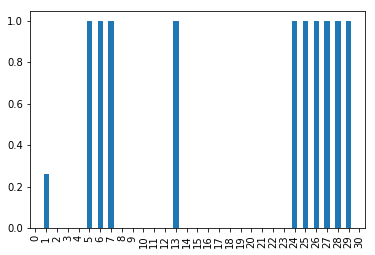

In [779]:
import pandas as pd

df=pd.DataFrame(tX0)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [780]:
tX0_dropped=np.delete(tX0,[5,6,7,13,24,25,26,27,28,29],axis=1)
tX0_dropped

array([[3.00000e+00, 1.43905e+02, 8.14170e+01, ..., 8.60620e+01,
        0.00000e+00, 0.00000e+00],
       [4.00000e+00, 1.75864e+02, 1.69150e+01, ..., 5.31310e+01,
        0.00000e+00, 0.00000e+00],
       [8.00000e+00, 1.05594e+02, 5.05590e+01, ..., 1.29804e+02,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.49996e+05,         nan, 5.81790e+01, ..., 8.04080e+01,
        0.00000e+00, 0.00000e+00],
       [2.49998e+05, 9.49510e+01, 1.93620e+01, ..., 1.12718e+02,
        0.00000e+00, 0.00000e+00],
       [2.49999e+05,         nan, 7.27560e+01, ..., 9.94050e+01,
        0.00000e+00, 0.00000e+00]])

In [781]:
tX0_dropped[:,1:2]=nan_to_median(tX0_dropped[:,1:2])

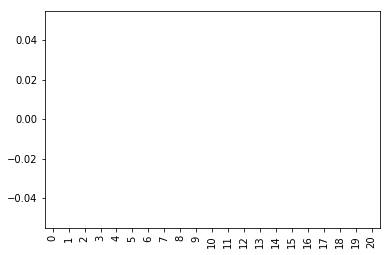

In [782]:
df=pd.DataFrame(tX0_dropped)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

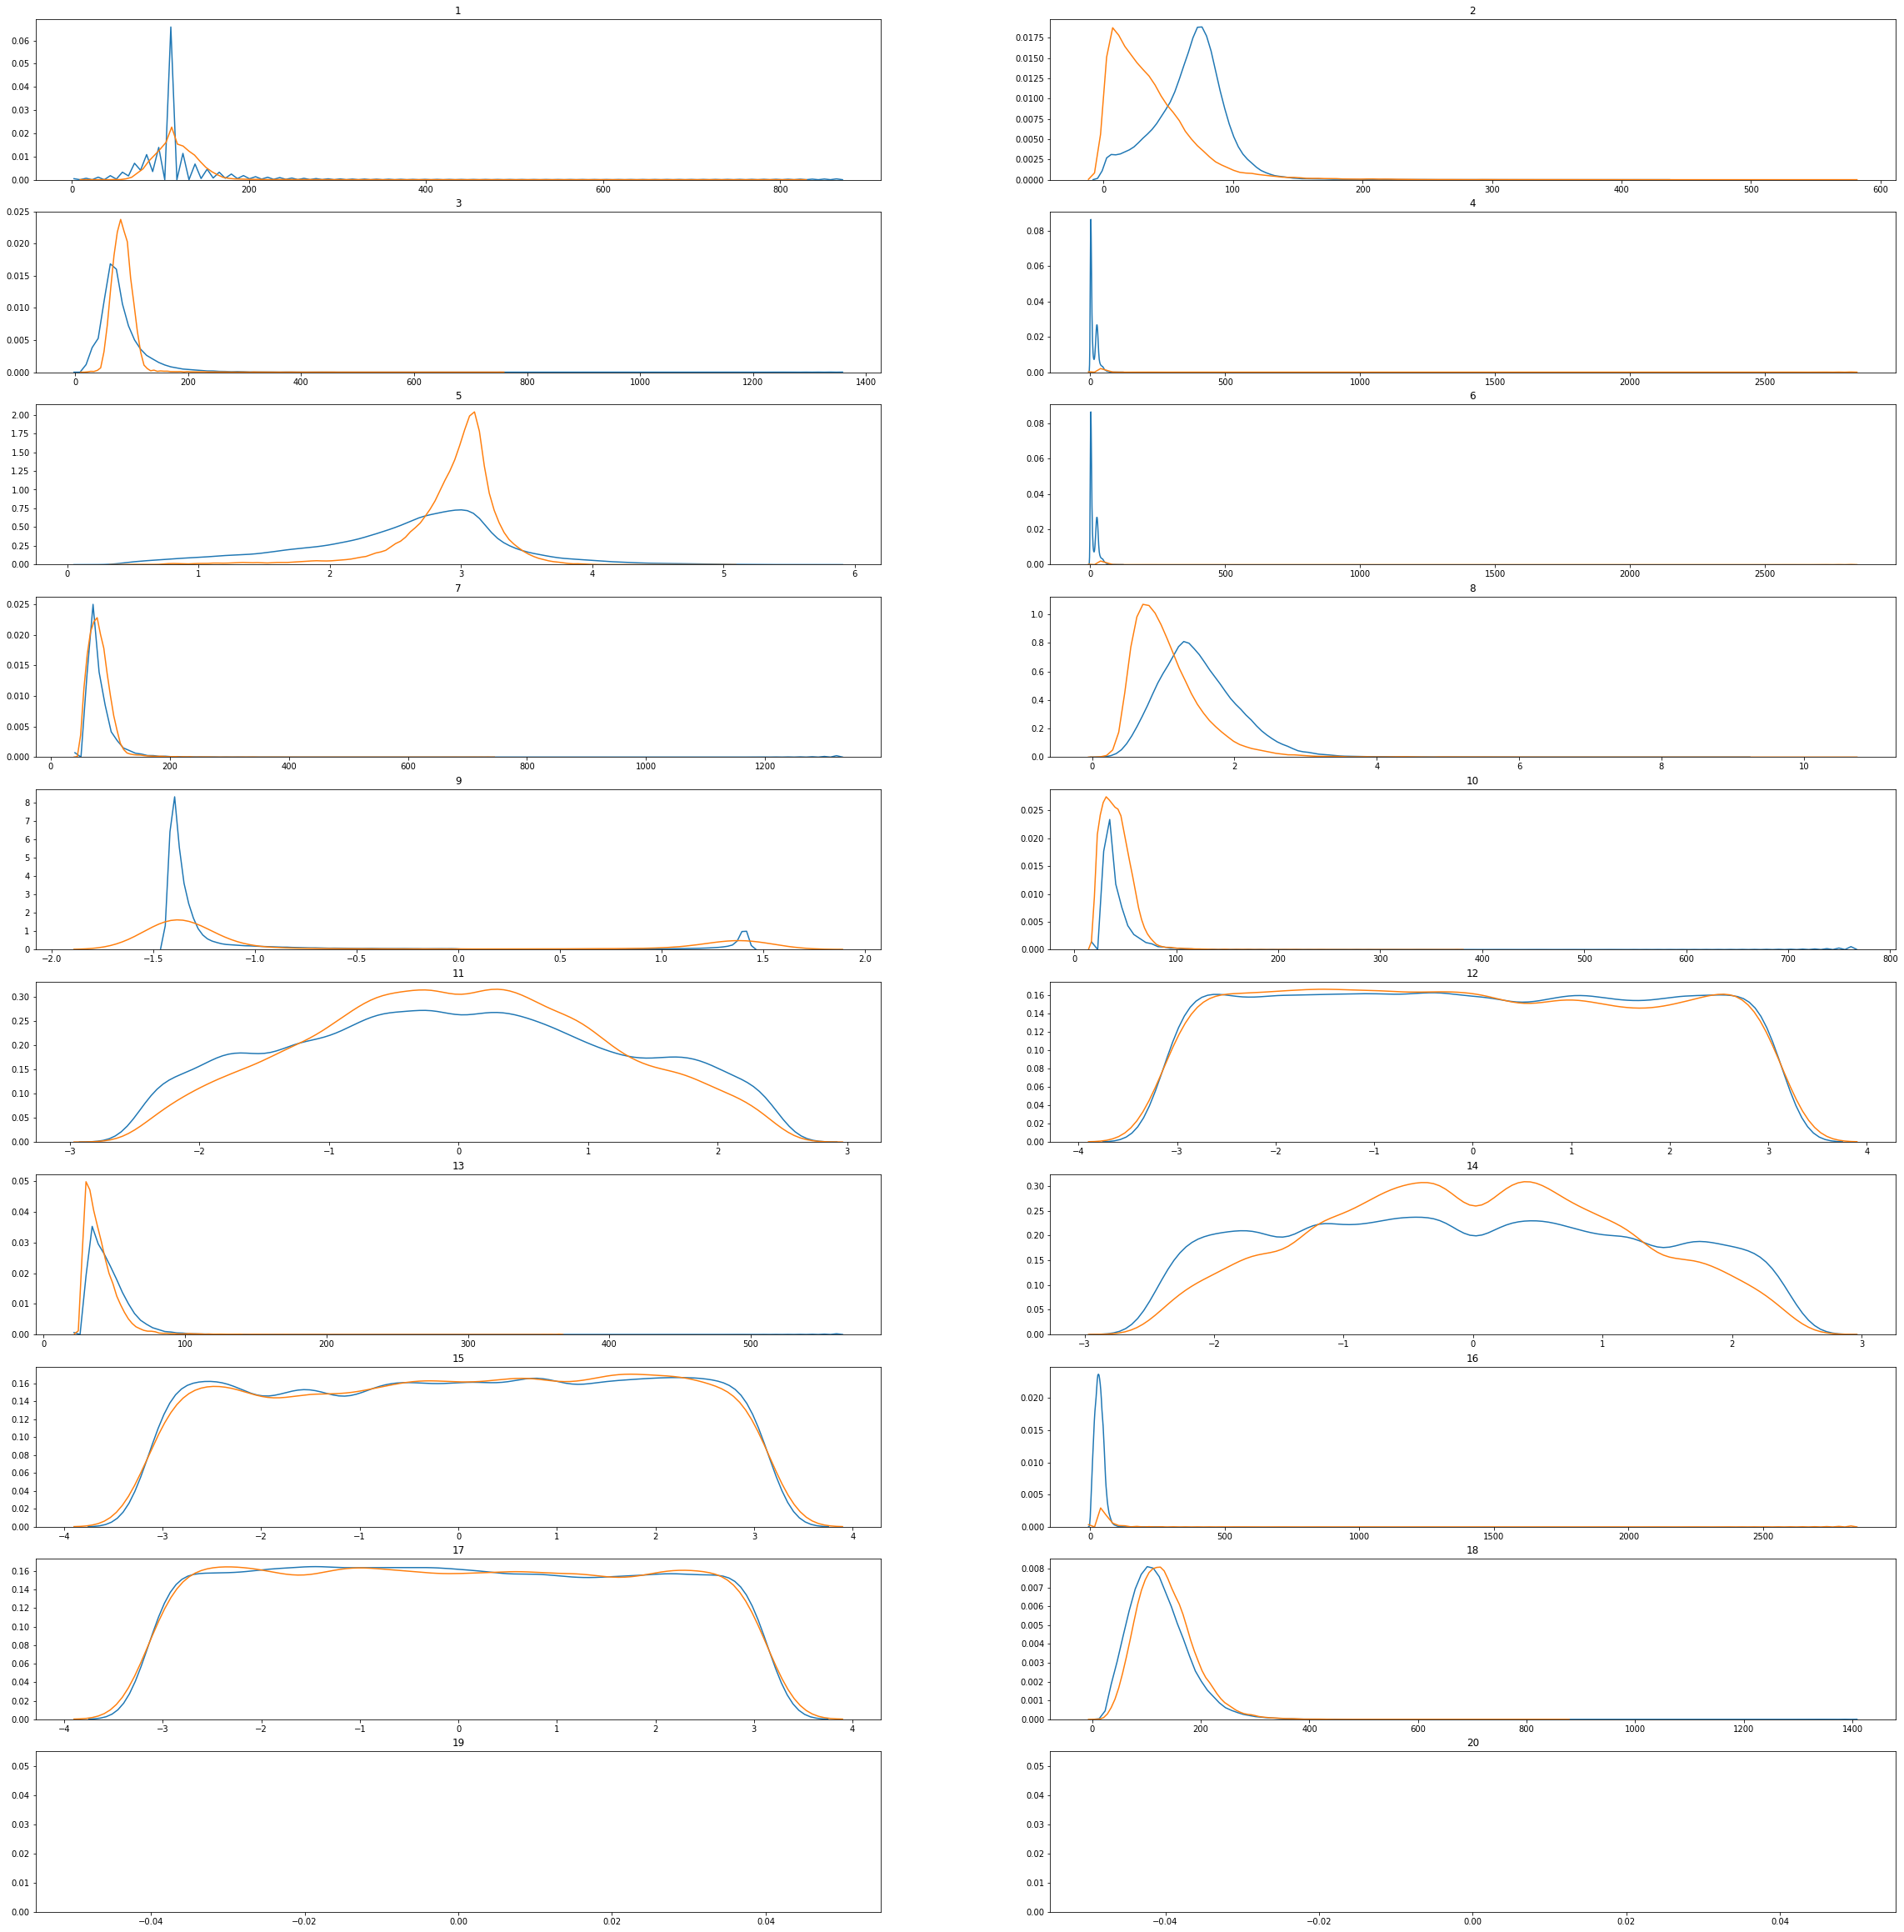

In [783]:
import seaborn as sns

labels_dropped0=y[tX0_dropped[:,0].astype(int)]
tX0_label0=tX0_dropped[labels_dropped0==-1]
tX0_label1=tX0_dropped[labels_dropped0==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)


In [784]:
tX0_dropped_distribution=np.delete(tX0_dropped,[4,12,19,20],axis=1)

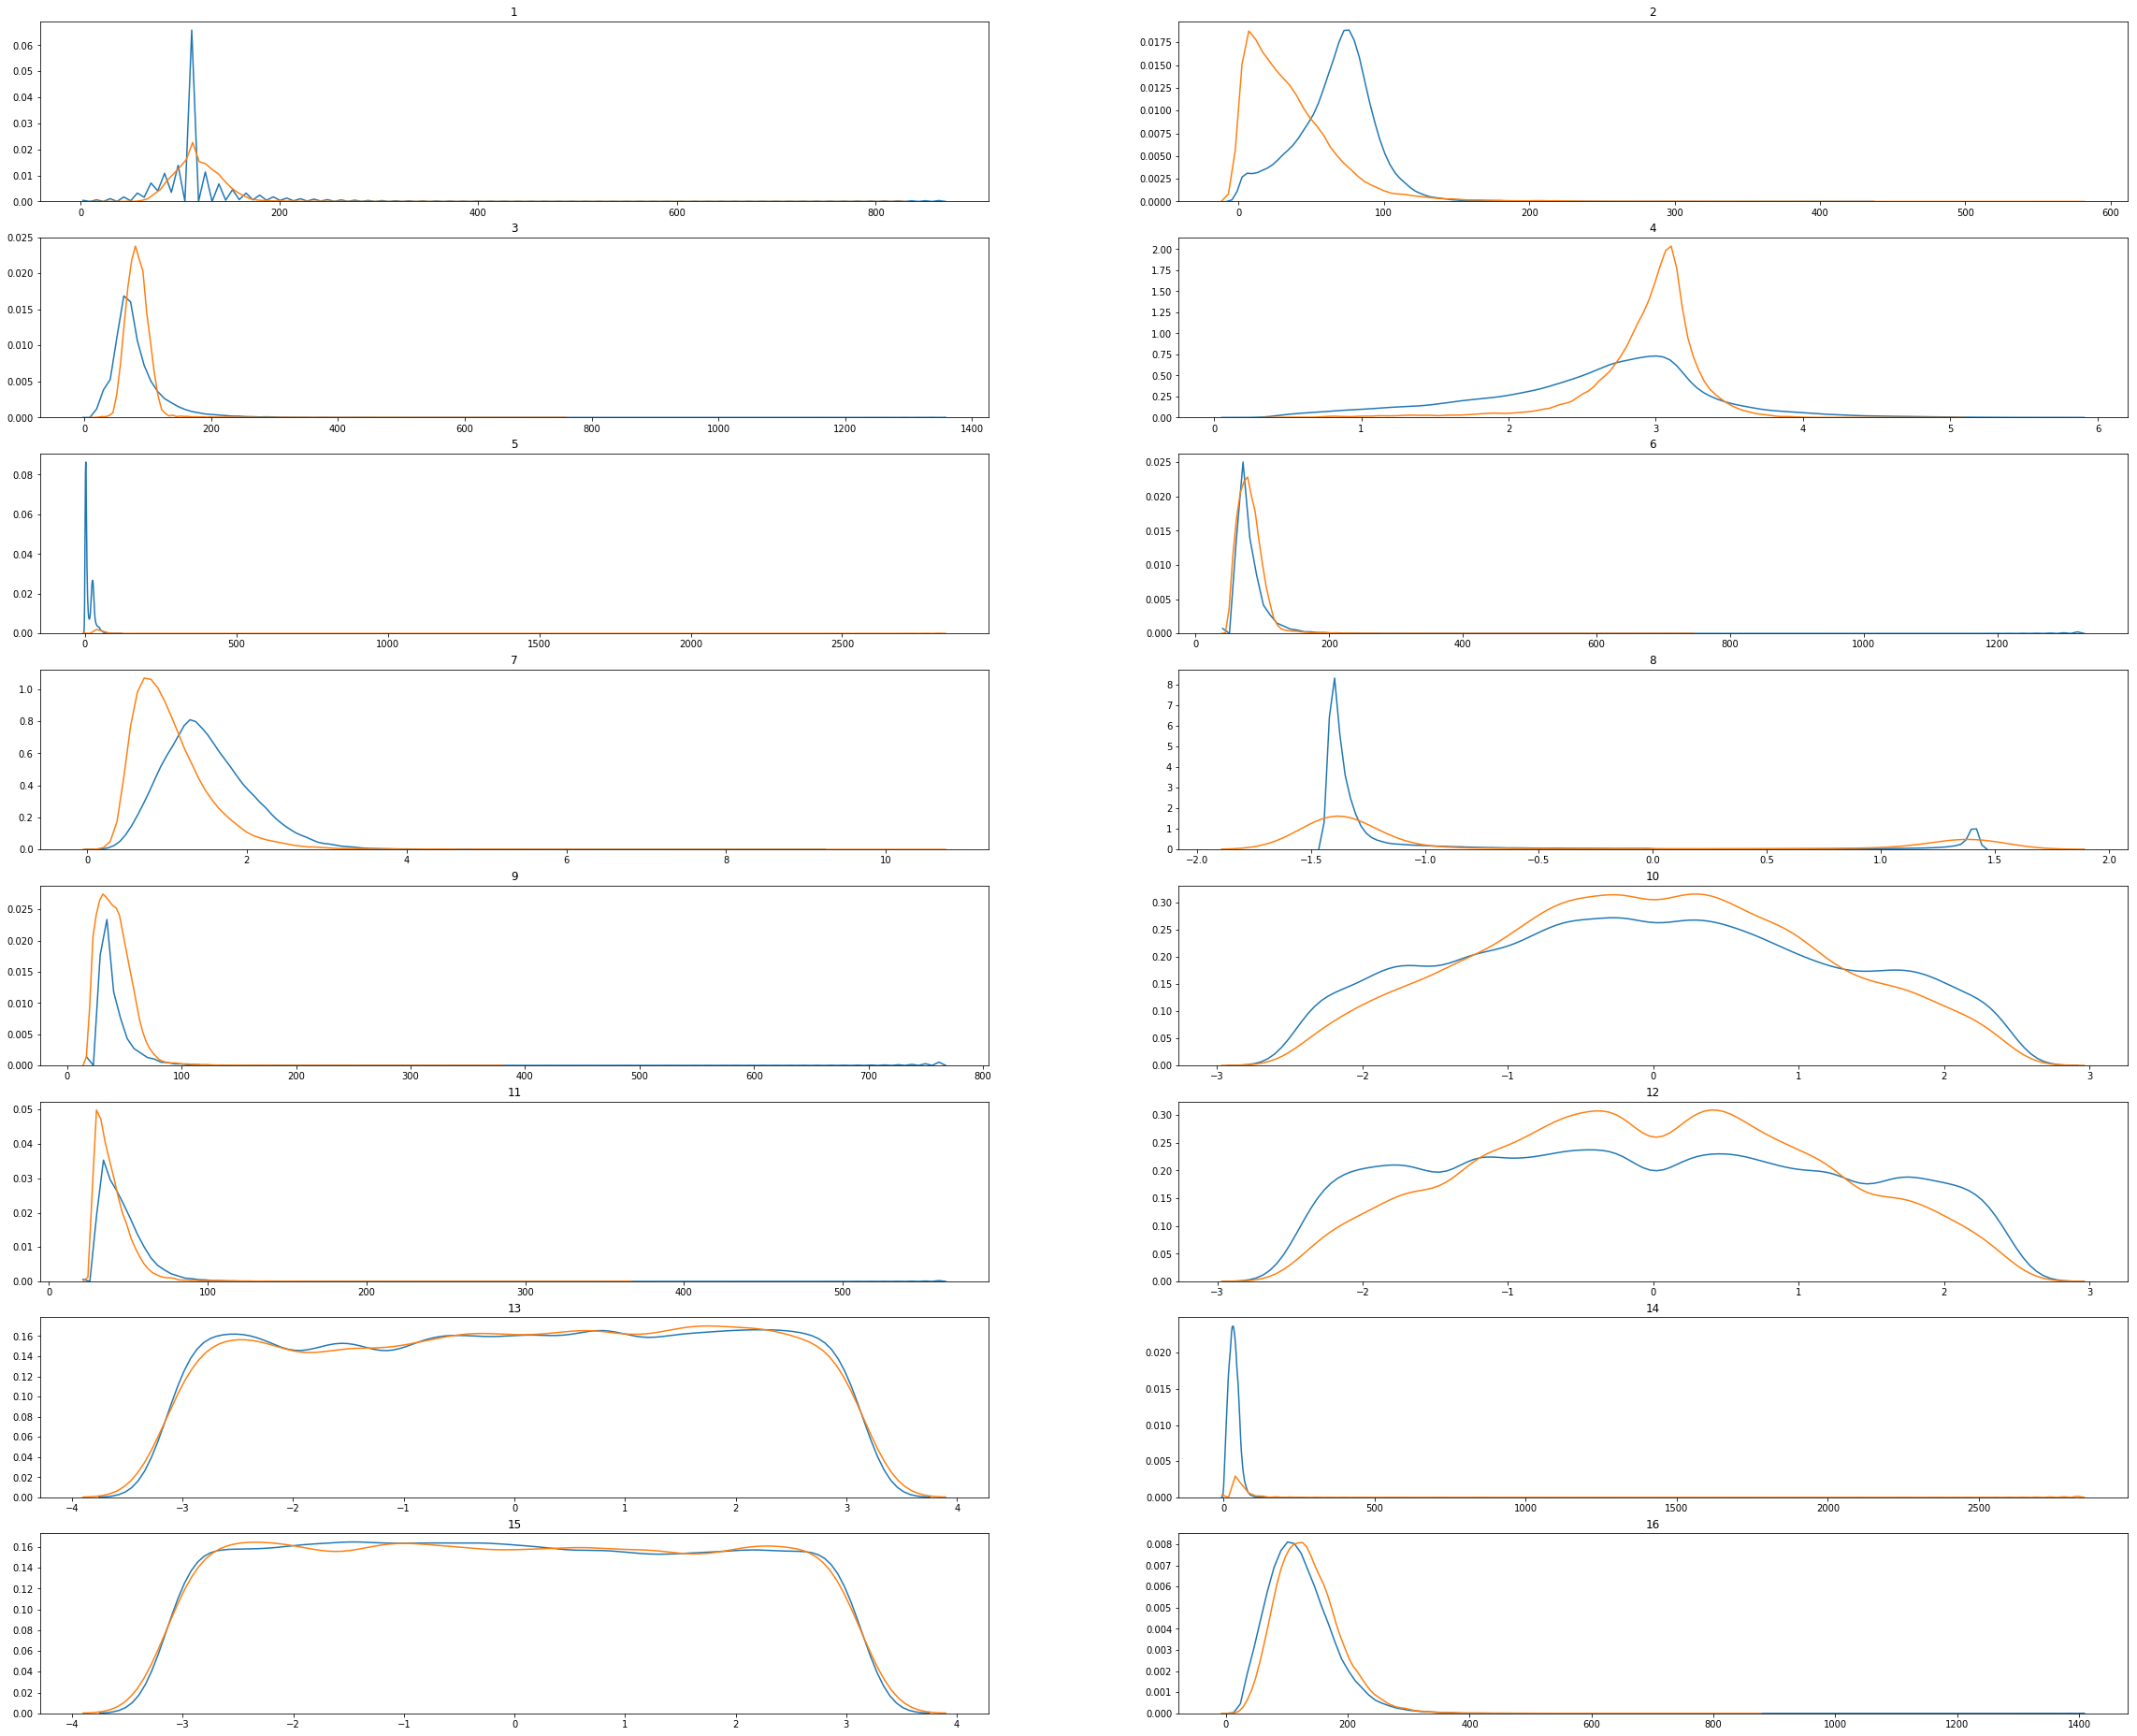

In [785]:
labels_dropped0=y[tX0_dropped_distribution[:,0].astype(int)]
tX0_label0=tX0_dropped_distribution[labels_dropped0==-1]
tX0_label1=tX0_dropped_distribution[labels_dropped0==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)

In [786]:
#index_to_be_skewed=[2,4,6,7,11]
#tX0_skew_mins=np.apply_along_axis(np.min,0,tX0_dropped_distribution)
#tX0_dropped_distribution[:,index_to_be_skewed]=tX0_dropped_distribution[:,index_to_be_skewed]+np.abs(tX0_skew_mins[index_to_be_skewed])
#tX0_dropped_distribution[:,index_to_be_skewed]= np.log(tX0_dropped_distribution[:,index_to_be_skewed]+1)

tX0_dropped_distribution[:,1:]=standardize(tX0_dropped_distribution[:,1:])

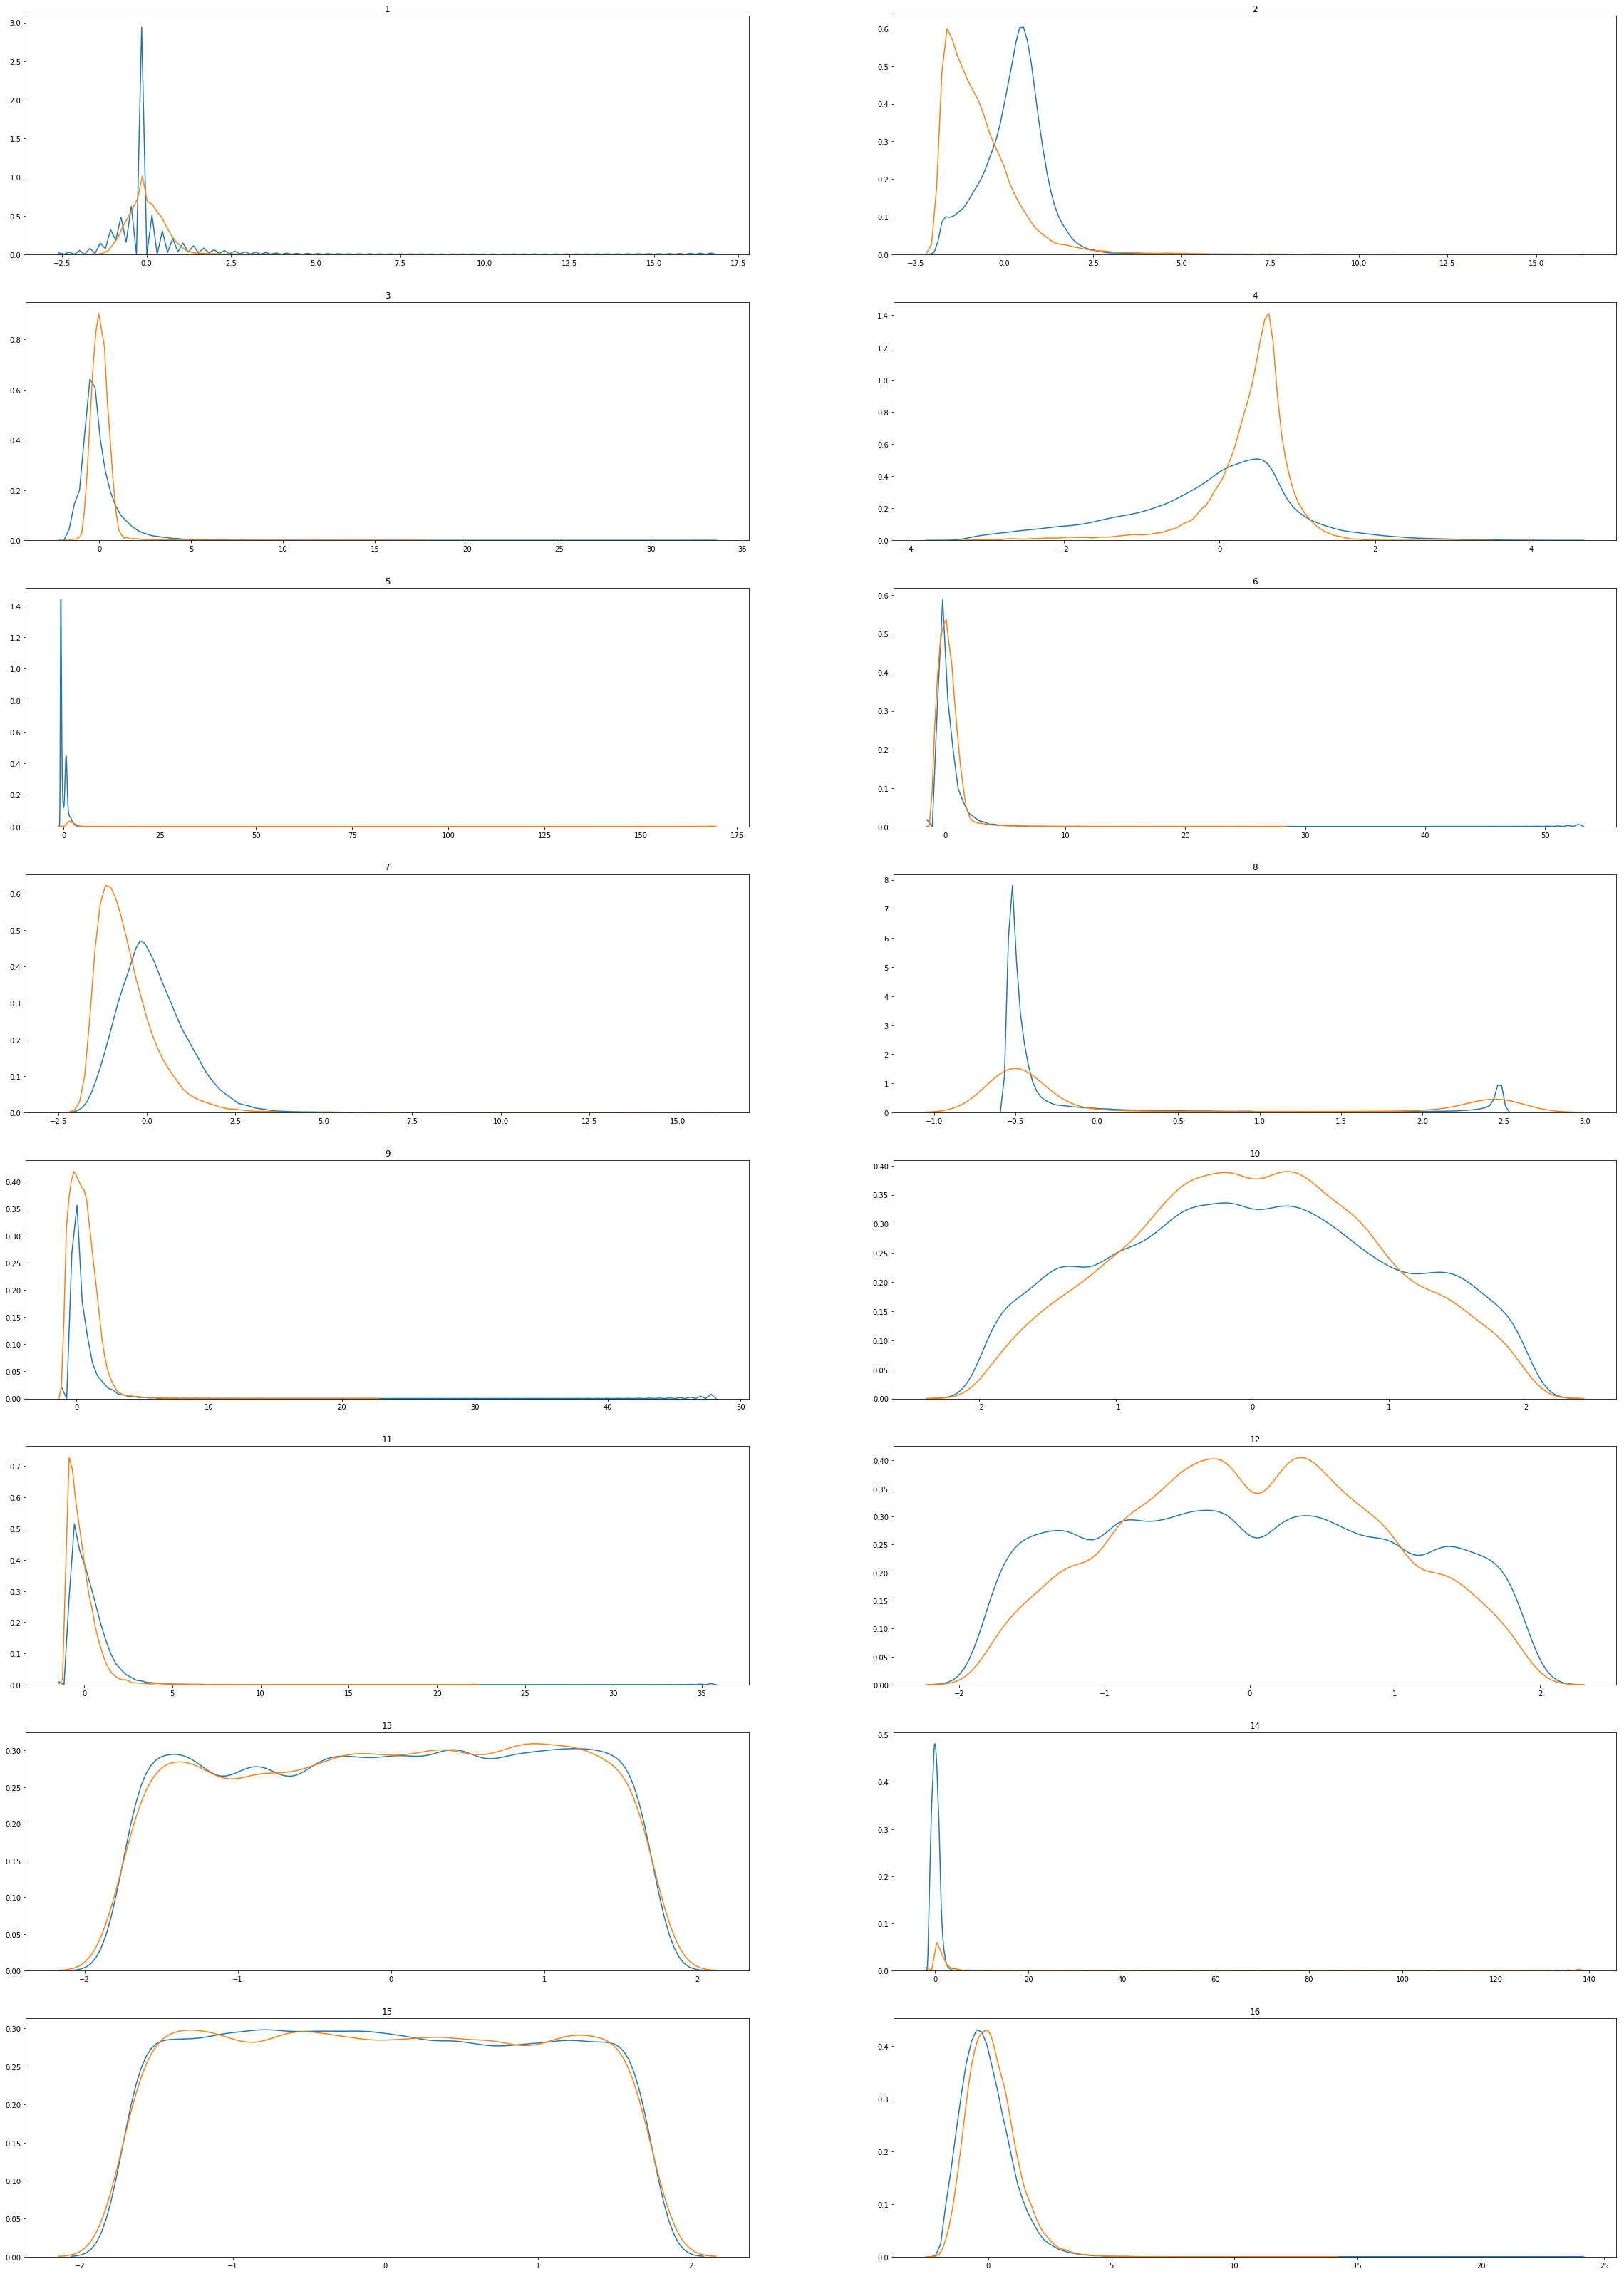

In [787]:
labels_dropped0=y[tX0_dropped_distribution[:,0].astype(int)]
tX0_label0=tX0_dropped_distribution[labels_dropped0==-1]
tX0_label1=tX0_dropped_distribution[labels_dropped0==1]

fig1=plt.figure(figsize=(40,80))
for i in range(1,tX0_label0.shape[1]):
    plt.subplot(11,2,i)
    plt.title(i)
    sns.distplot(tX0_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX0_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tx1

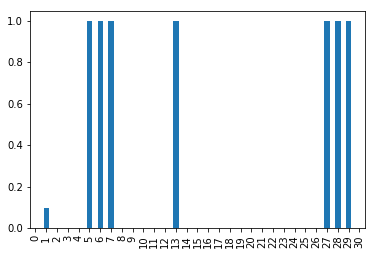

In [788]:
import pandas as pd

df=pd.DataFrame(tX1)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [789]:
tX1_dropped=np.delete(tX1,[5,6,7,13,27,28,29],axis=1)

In [790]:
tX1_dropped[:,1:2]=nan_to_median(tX1_dropped[:,1:2])

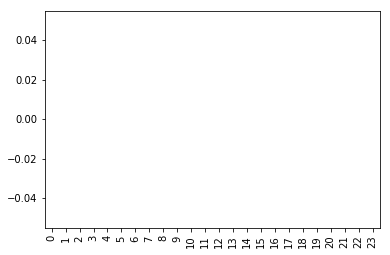

In [791]:
df=pd.DataFrame(tX1_dropped)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

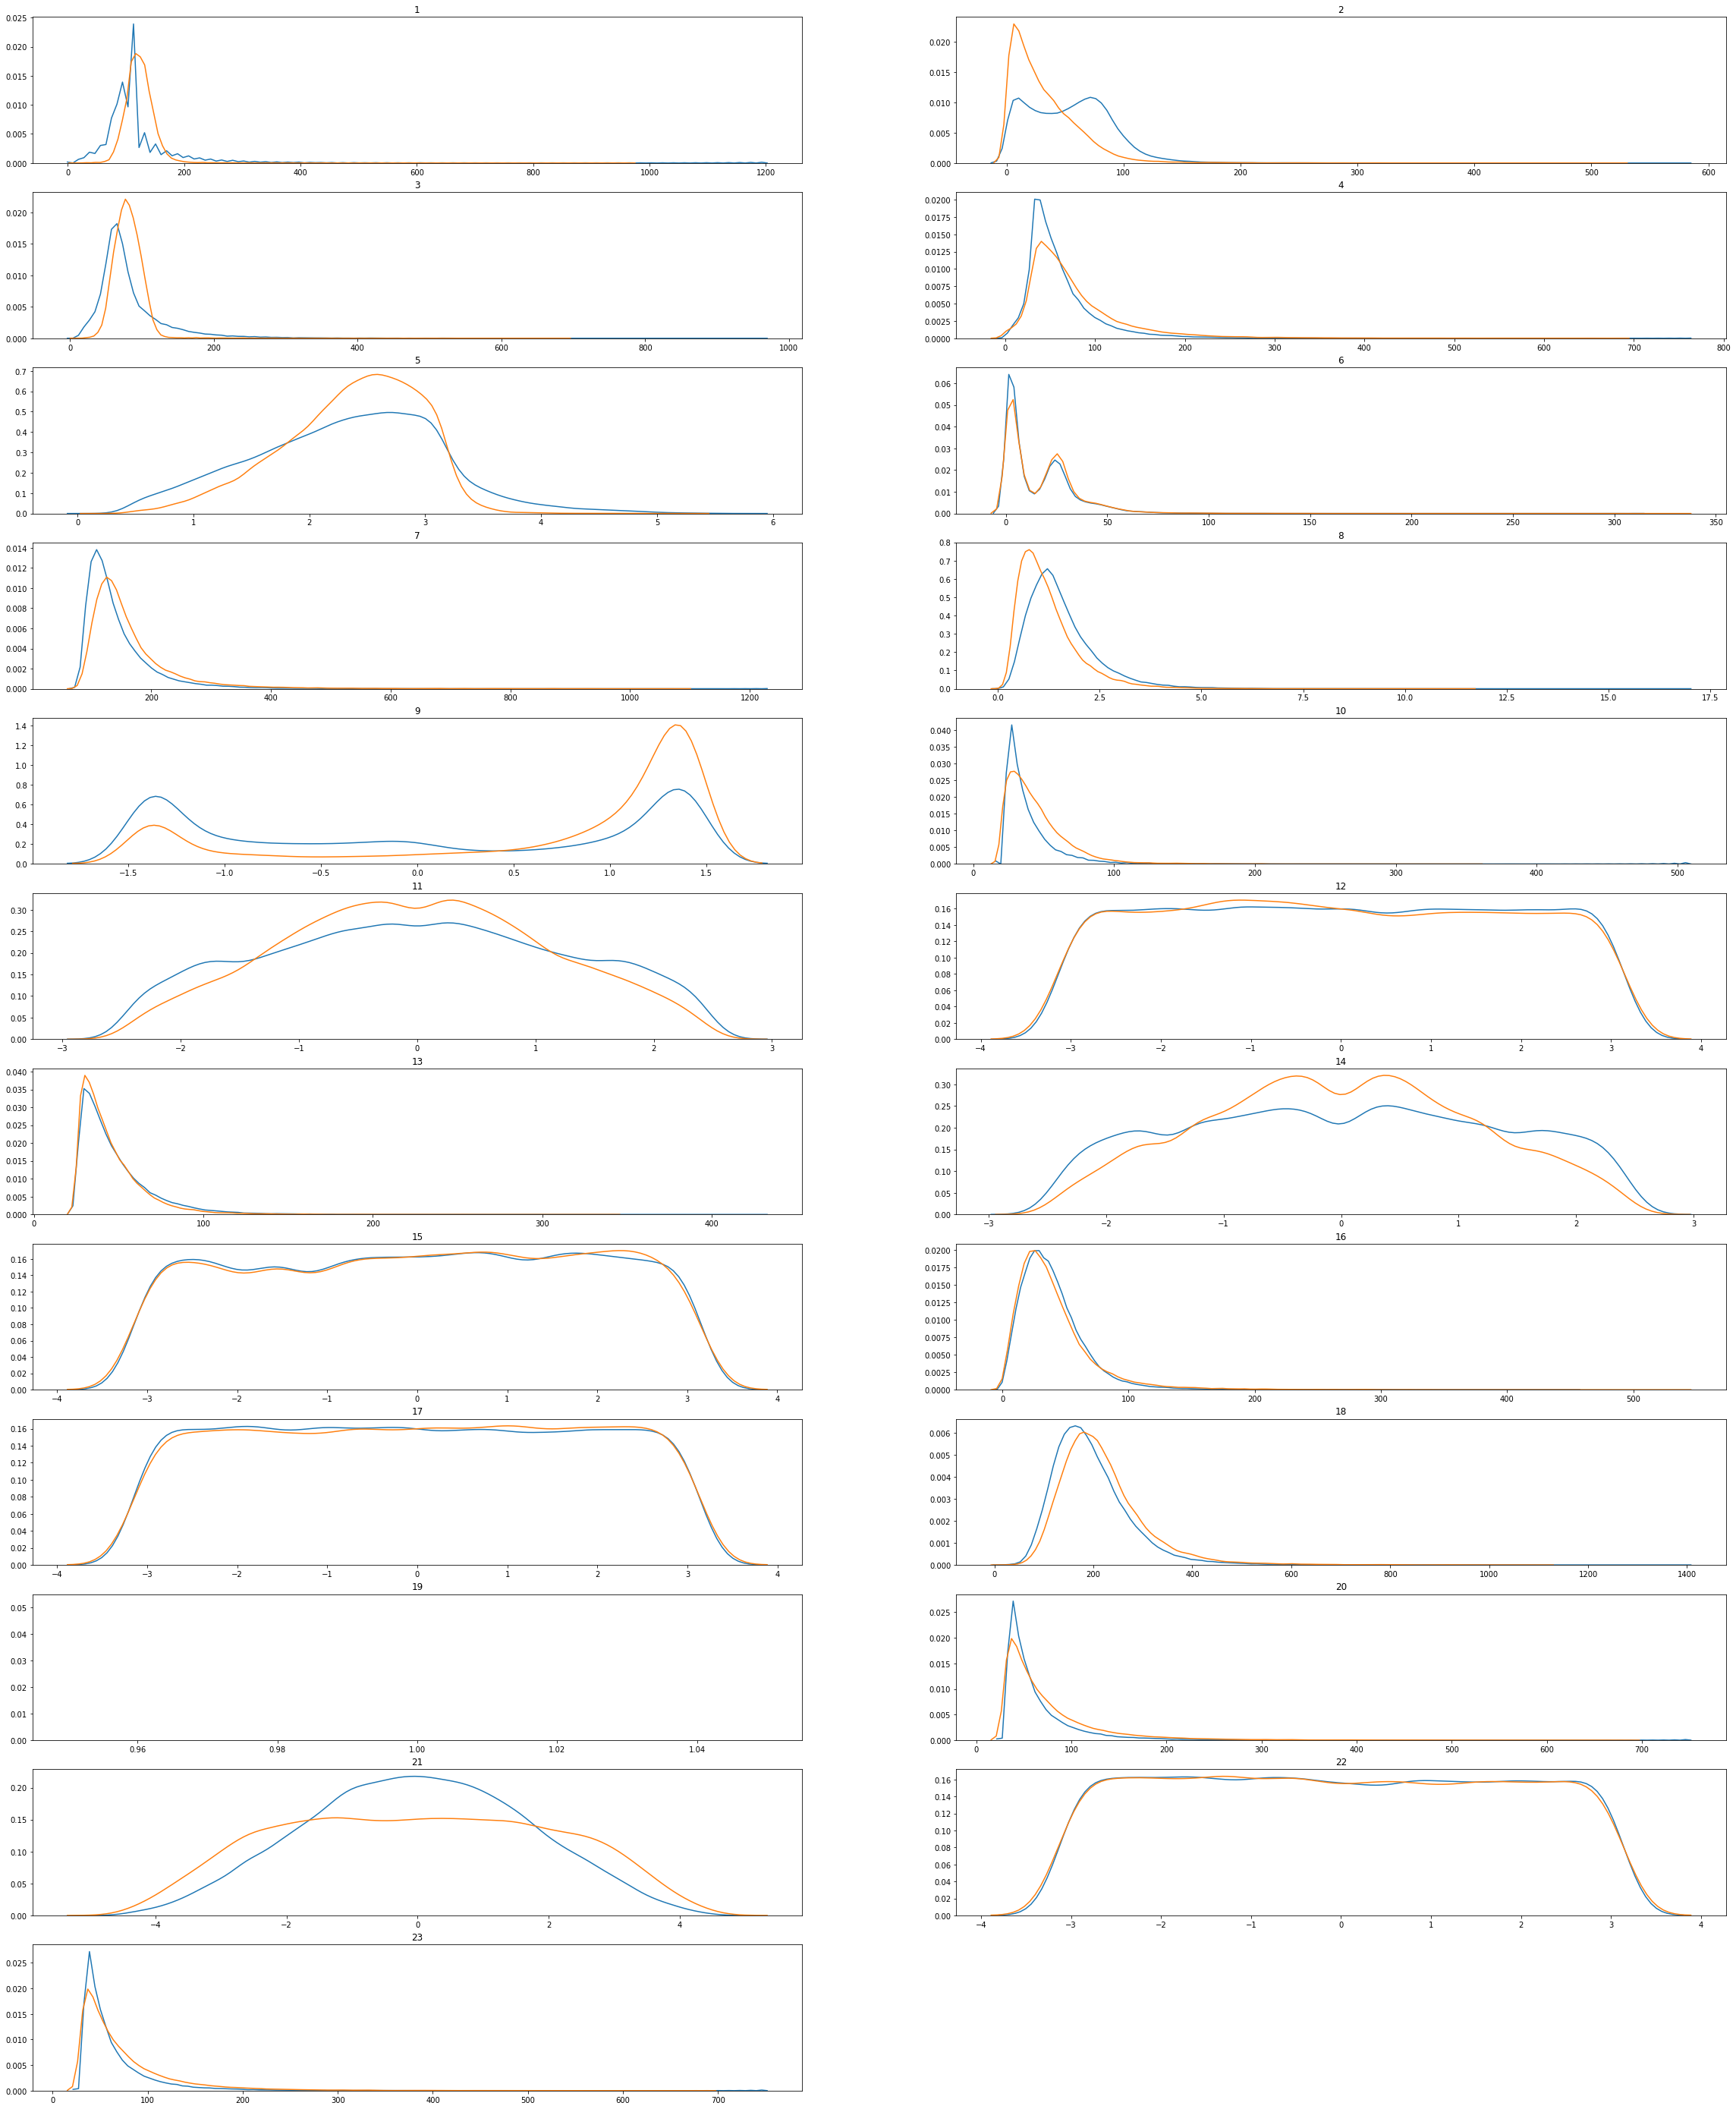

In [792]:
labels_dropped1=y[tX1_dropped[:,0].astype(int)]
tX1_label0=tX1_dropped[labels_dropped1==-1]
tX1_label1=tX1_dropped[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

In [793]:
tX1_dropped_distribution=np.delete(tX1_dropped,[12,15,17,19,20],axis=1)
#tX1_dropped_distribution=np.delete(tX1_dropped,[19,20],axis=1)

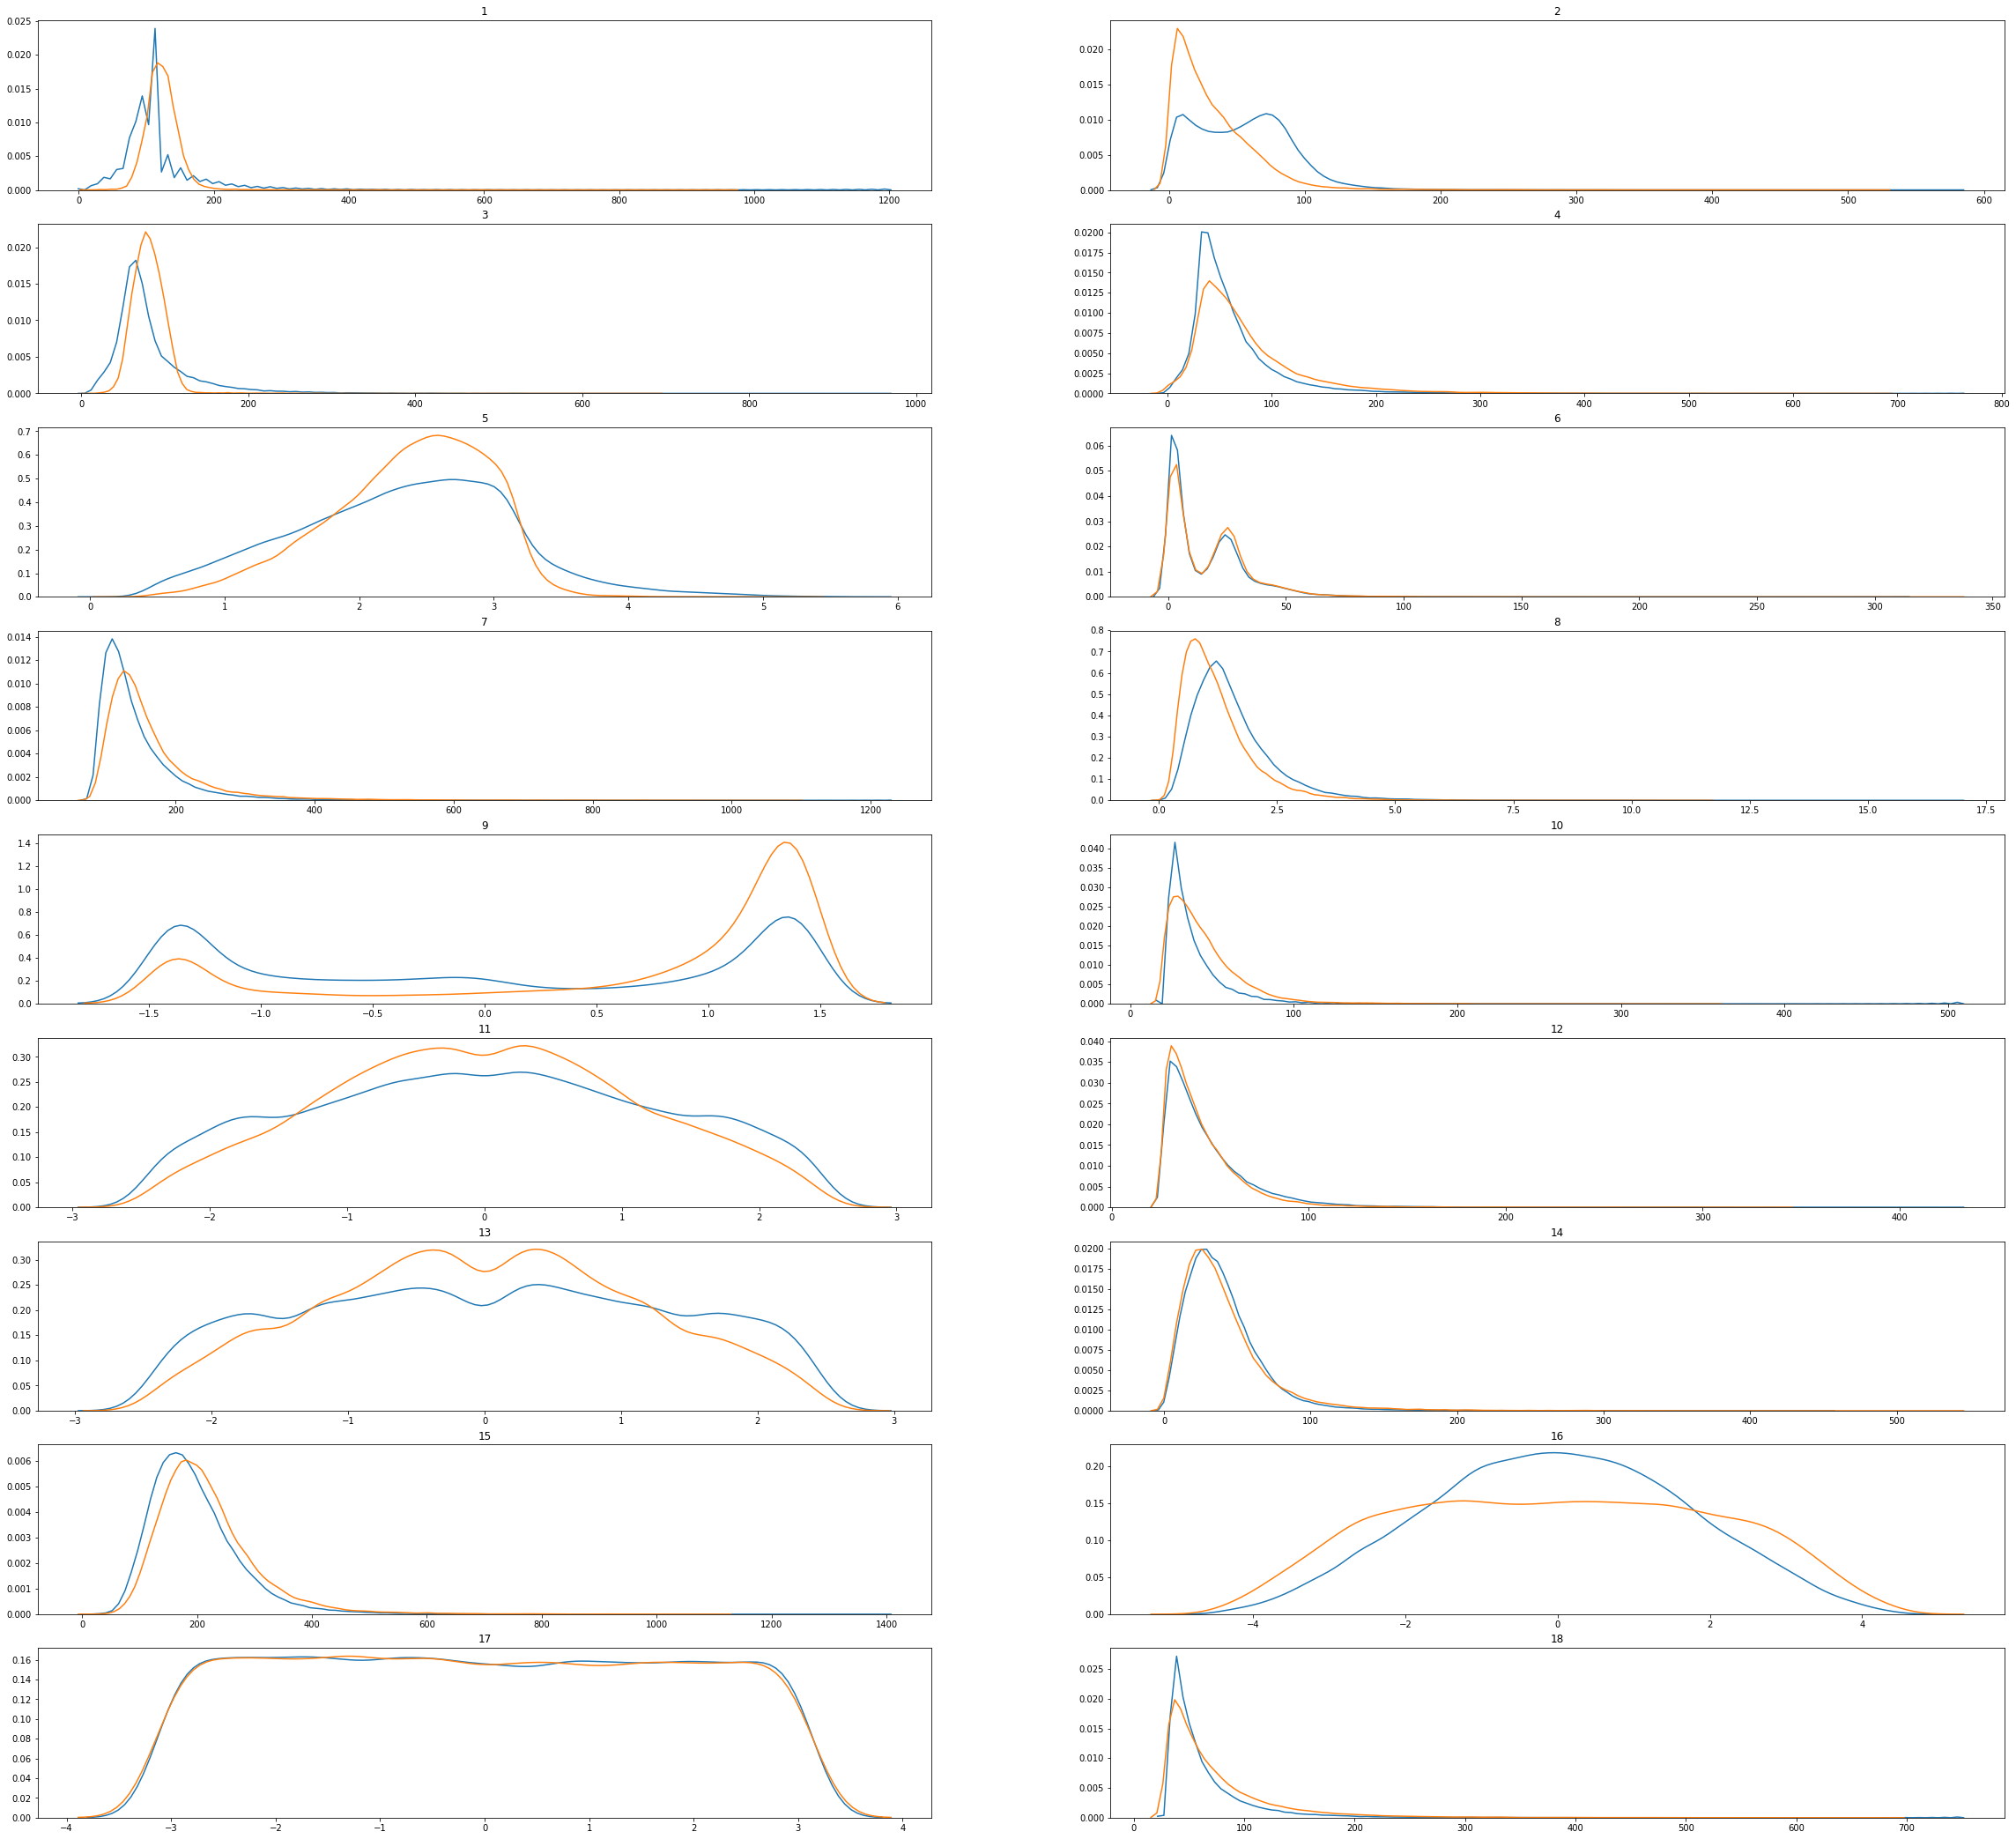

In [794]:
labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
tX1_label1=tX1_dropped_distribution[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX1_label1.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

In [795]:
#index_to_be_skewed=[10,12,18]
#tX1_skew_mins=np.apply_along_axis(np.min,0,tX1_dropped_distribution)
#tX1_dropped_distribution[:,index_to_be_skewed]=tX1_dropped_distribution[:,index_to_be_skewed]+np.abs(tX1_skew_mins[index_to_be_skewed])
#tX1_dropped_distribution[:,index_to_be_skewed]= np.log(tX1_dropped_distribution[:,index_to_be_skewed]+1)

tX1_dropped_distribution[:,1:]=standardize(tX1_dropped_distribution[:,1:])

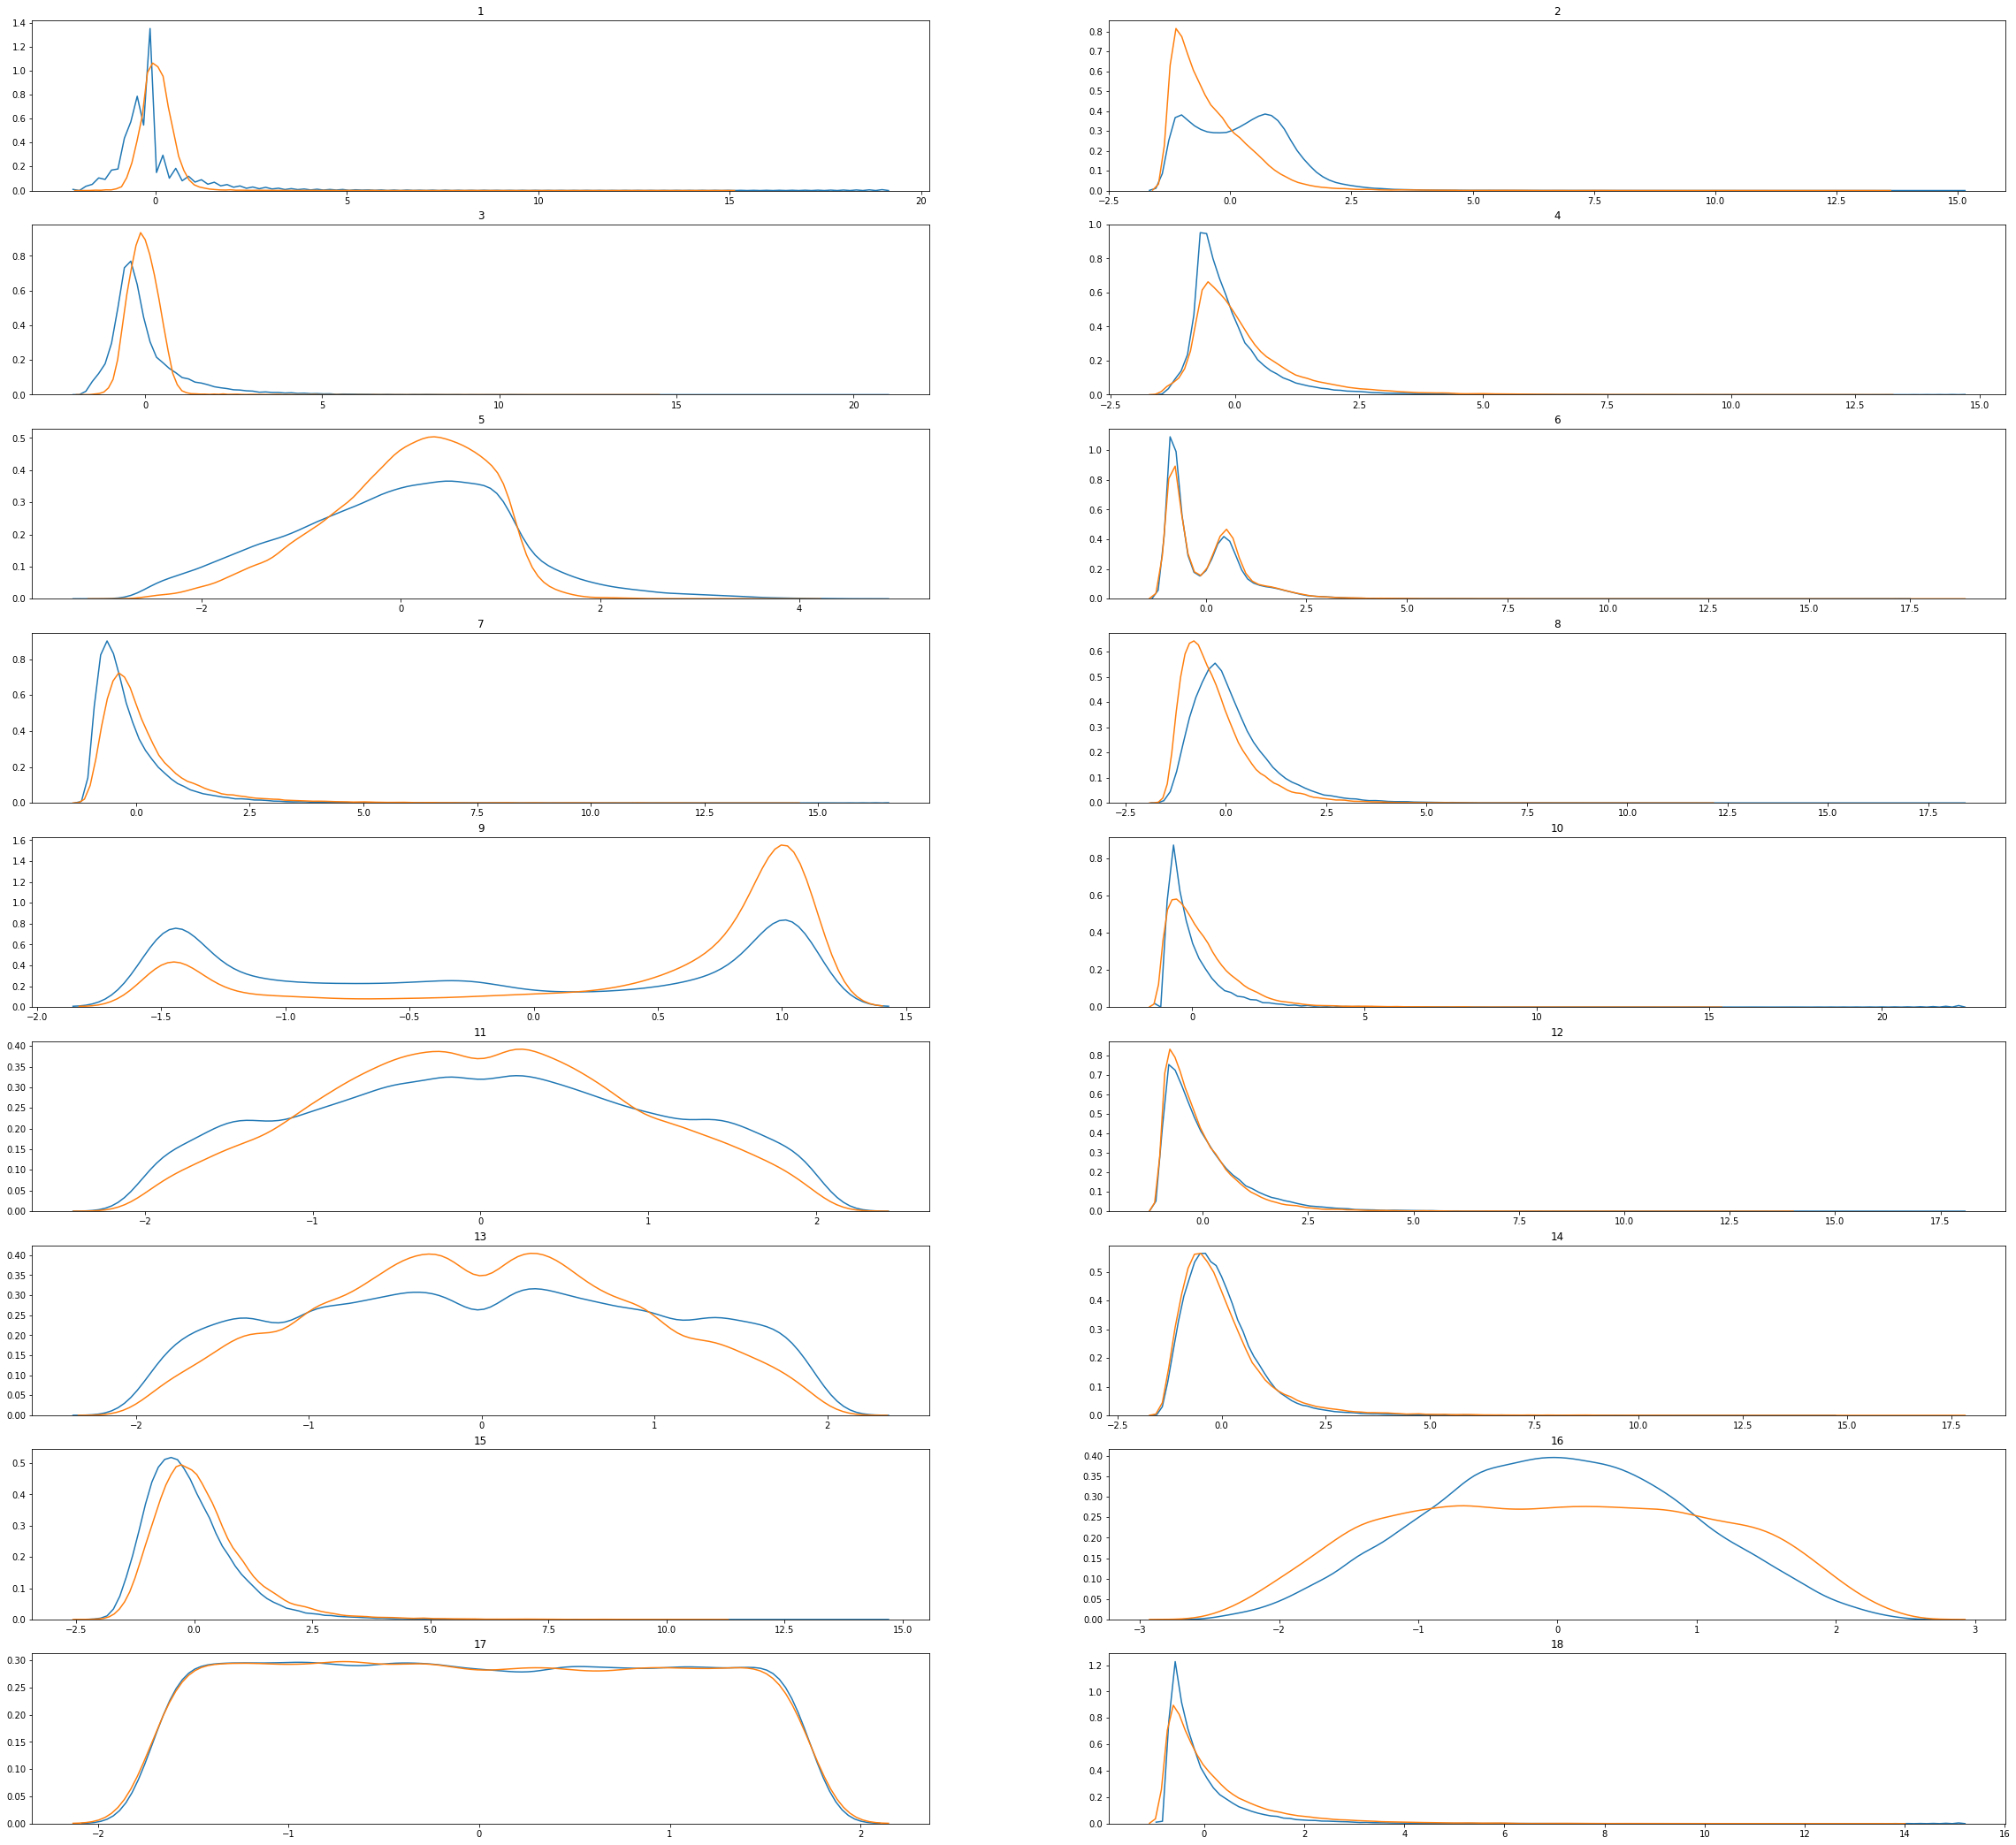

In [796]:
labels_dropped1=y[tX1_dropped_distribution[:,0].astype(int)]
tX1_label0=tX1_dropped_distribution[labels_dropped1==-1]
tX1_label1=tX1_dropped_distribution[labels_dropped1==1]
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX1_label0.shape[1]):
    plt.subplot(19,2,i)
    plt.title(i)
    sns.distplot(tX1_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX1_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tX2

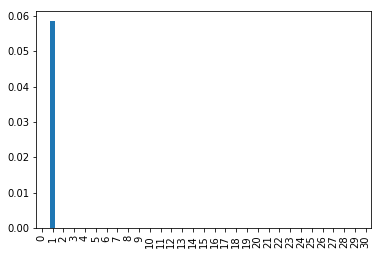

In [797]:
import pandas as pd

df=pd.DataFrame(tX2)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [798]:
tX2[:,1:2]=nan_to_median(tX2[:,1:2])

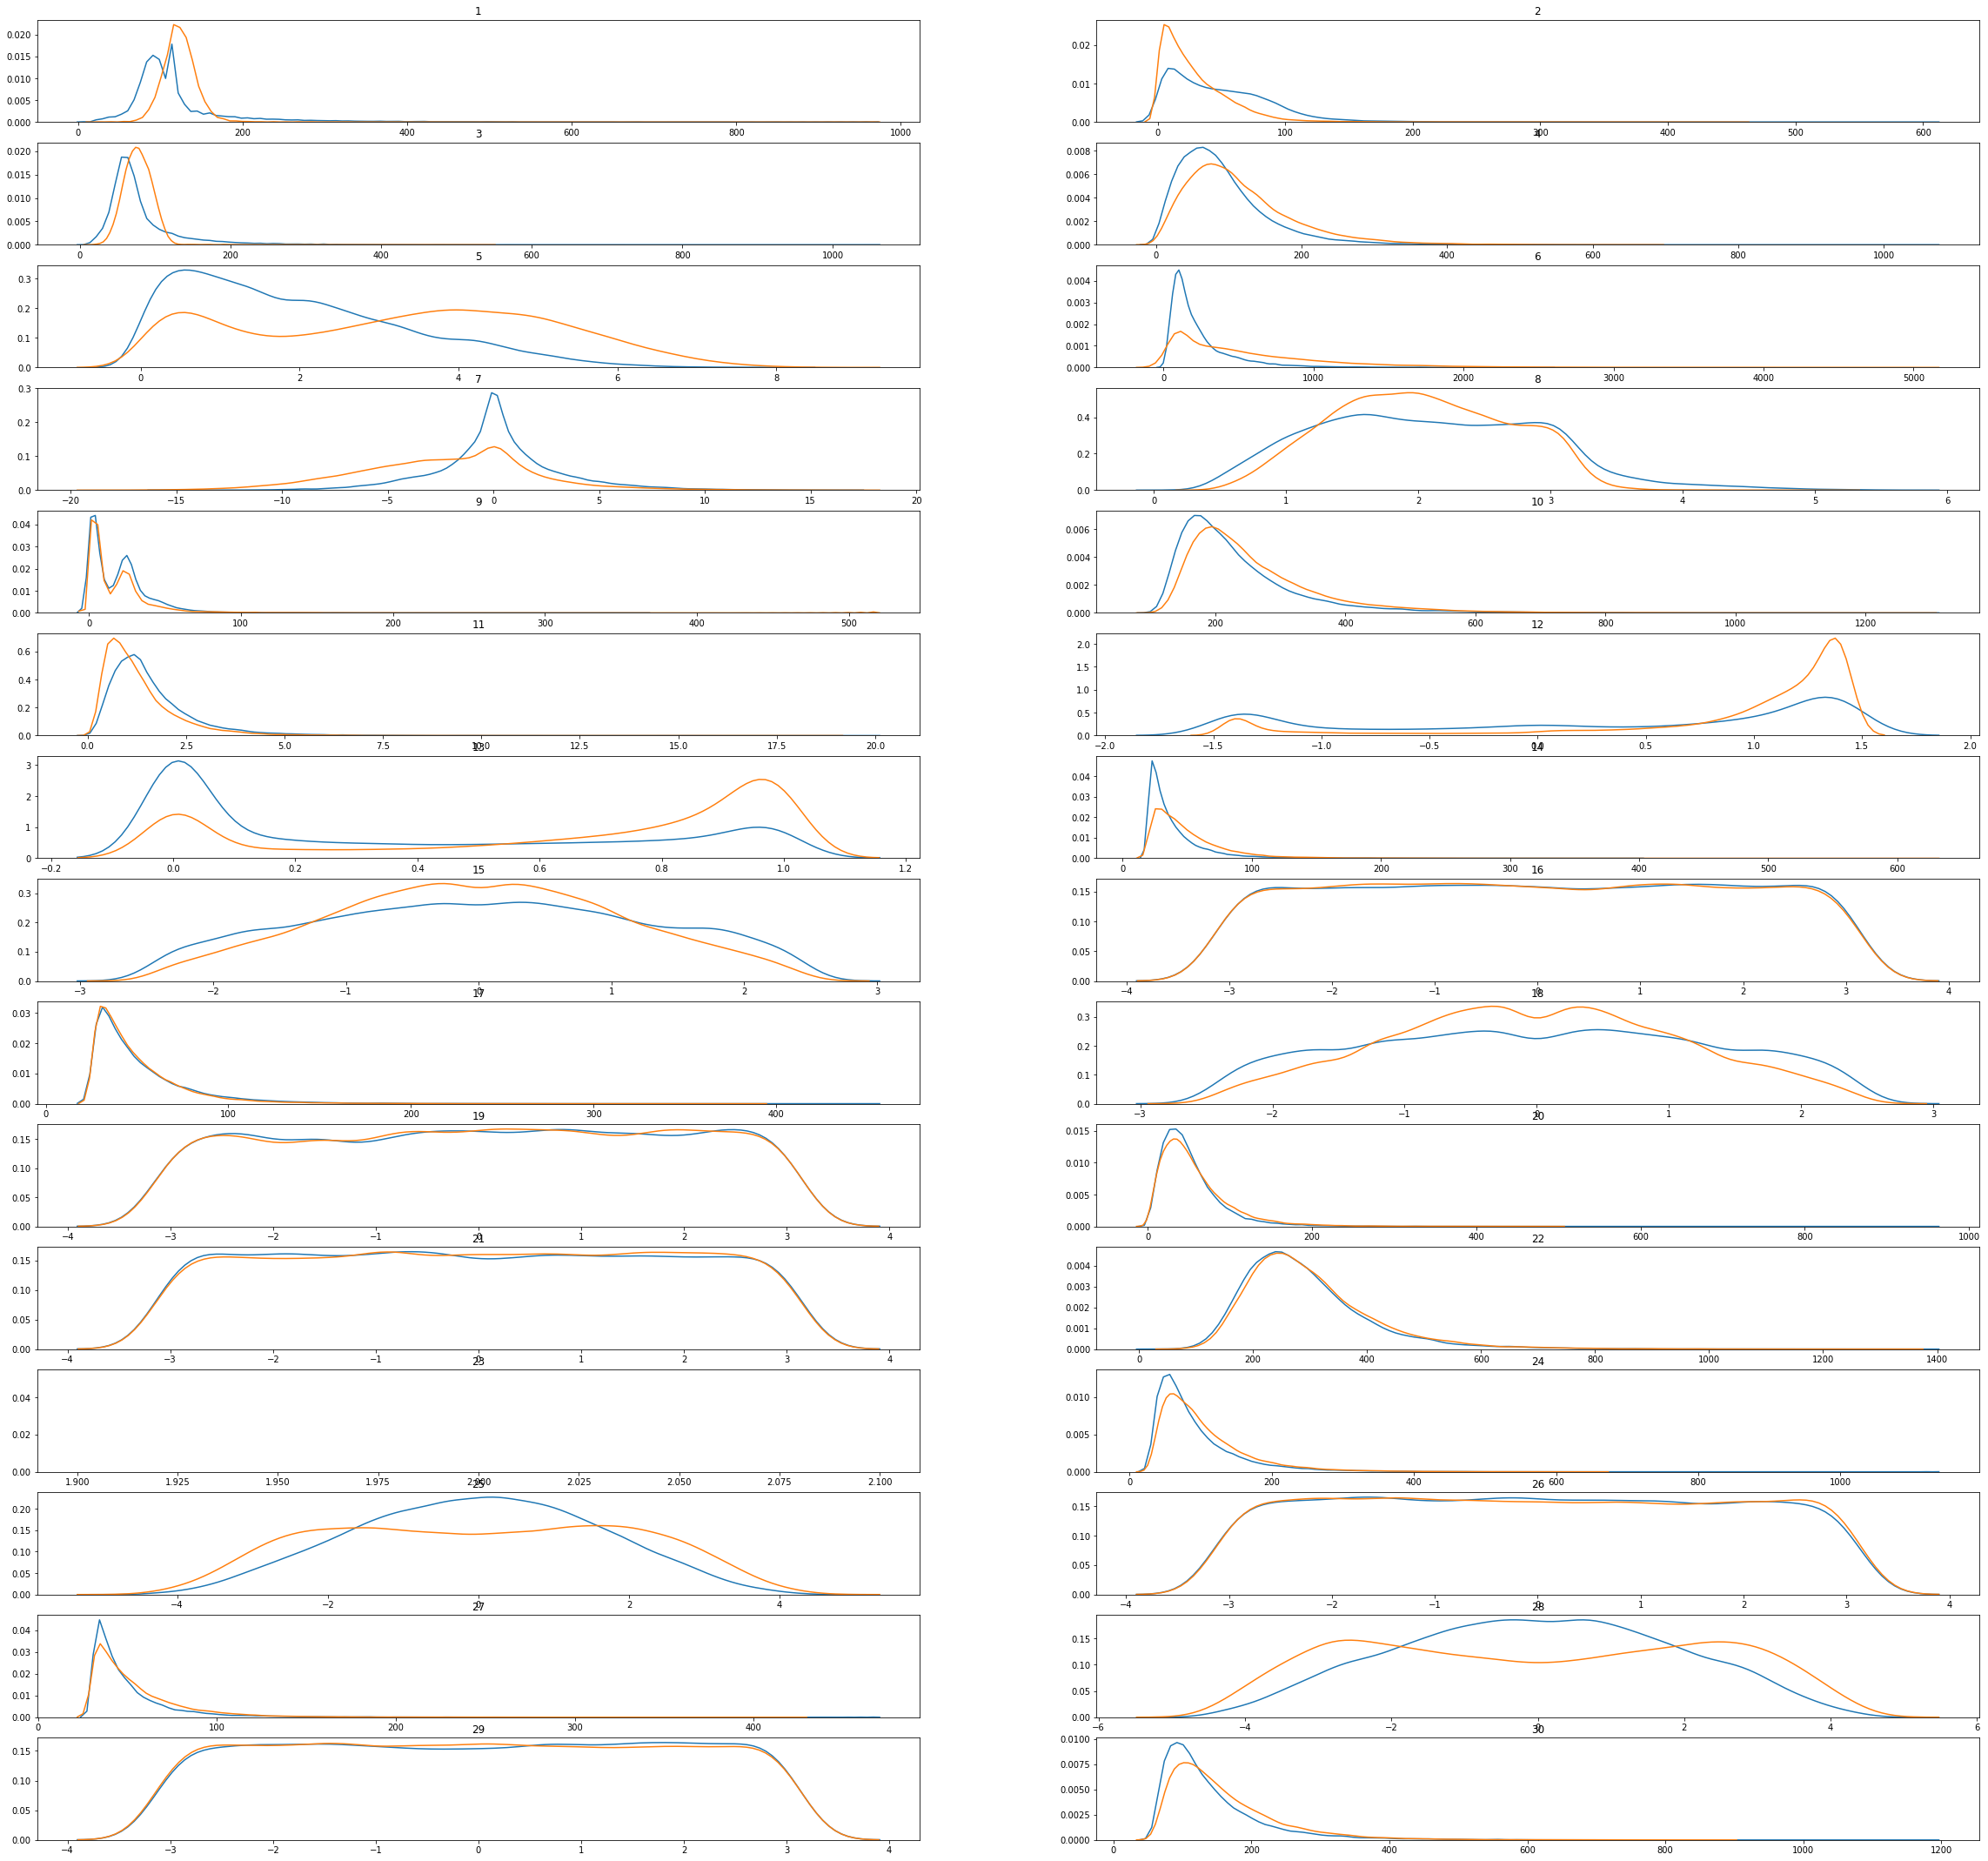

In [799]:
labels_dropped2=y[tX2[:,0].astype(int)]
tX2_label0=tX2[labels_dropped2==-1]
tX2_label1=tX2[labels_dropped2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(31,2,i)
    plt.title(i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

In [800]:
tX2_dropped_distribution=np.delete(tX2,[16,19,21,23,29,30],axis=1)
#tX2_dropped_distribution=np.delete(tX2,23,axis=1)

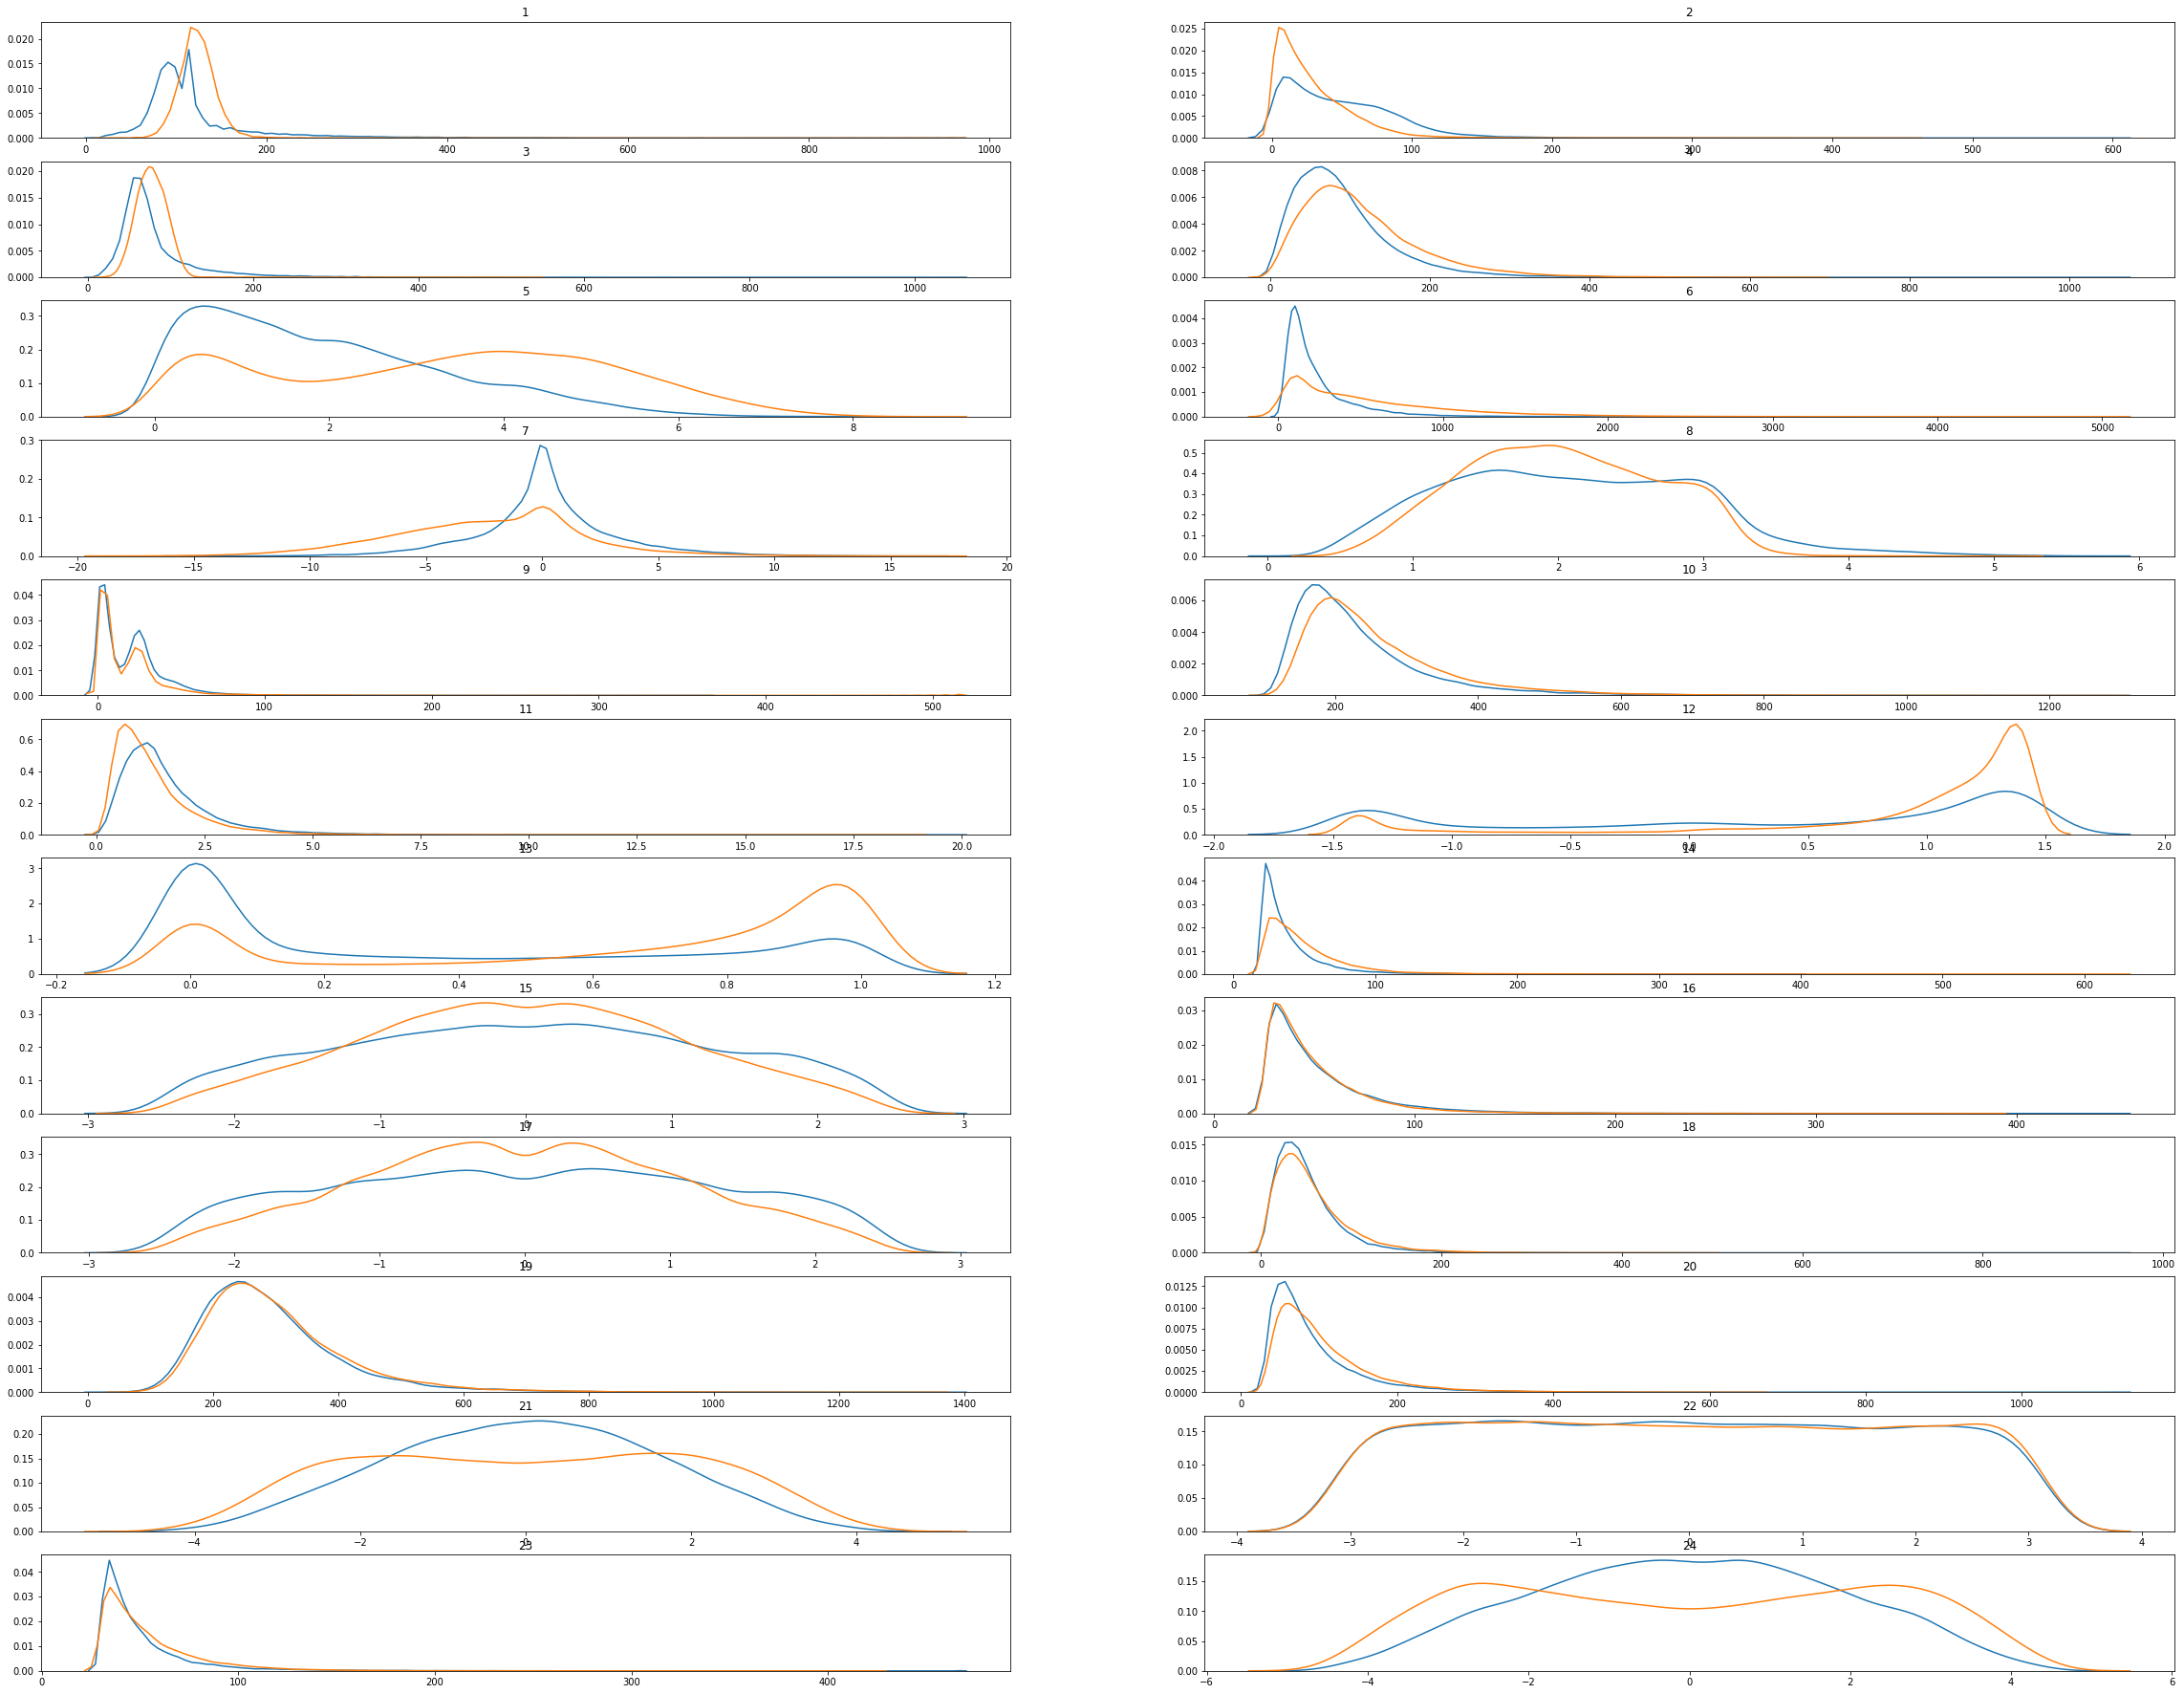

In [801]:
labels_dropped_distribution_2=y[tX2_dropped_distribution[:,0].astype(int)]
tX2_label0=tX2_dropped_distribution[labels_dropped_distribution_2==-1]
tX2_label1=tX2_dropped_distribution[labels_dropped_distribution_2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(30,2,i)
    plt.title(i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

In [802]:
#index_to_be_skewed=[2,4,6,11,14,16,20,23]
# tX2_skew_mins=np.apply_along_axis(np.min,0,tX2_dropped_distribution)
# tX2_dropped_distribution[:,index_to_be_skewed]=tX2_dropped_distribution[:,index_to_be_skewed]+np.abs(tX2_skew_mins[index_to_be_skewed])
# tX2_dropped_distribution[:,index_to_be_skewed]= np.log(tX2_dropped_distribution[:,index_to_be_skewed]+1)

tX2_dropped_distribution[:,1:]=standardize(tX2_dropped_distribution[:,1:])

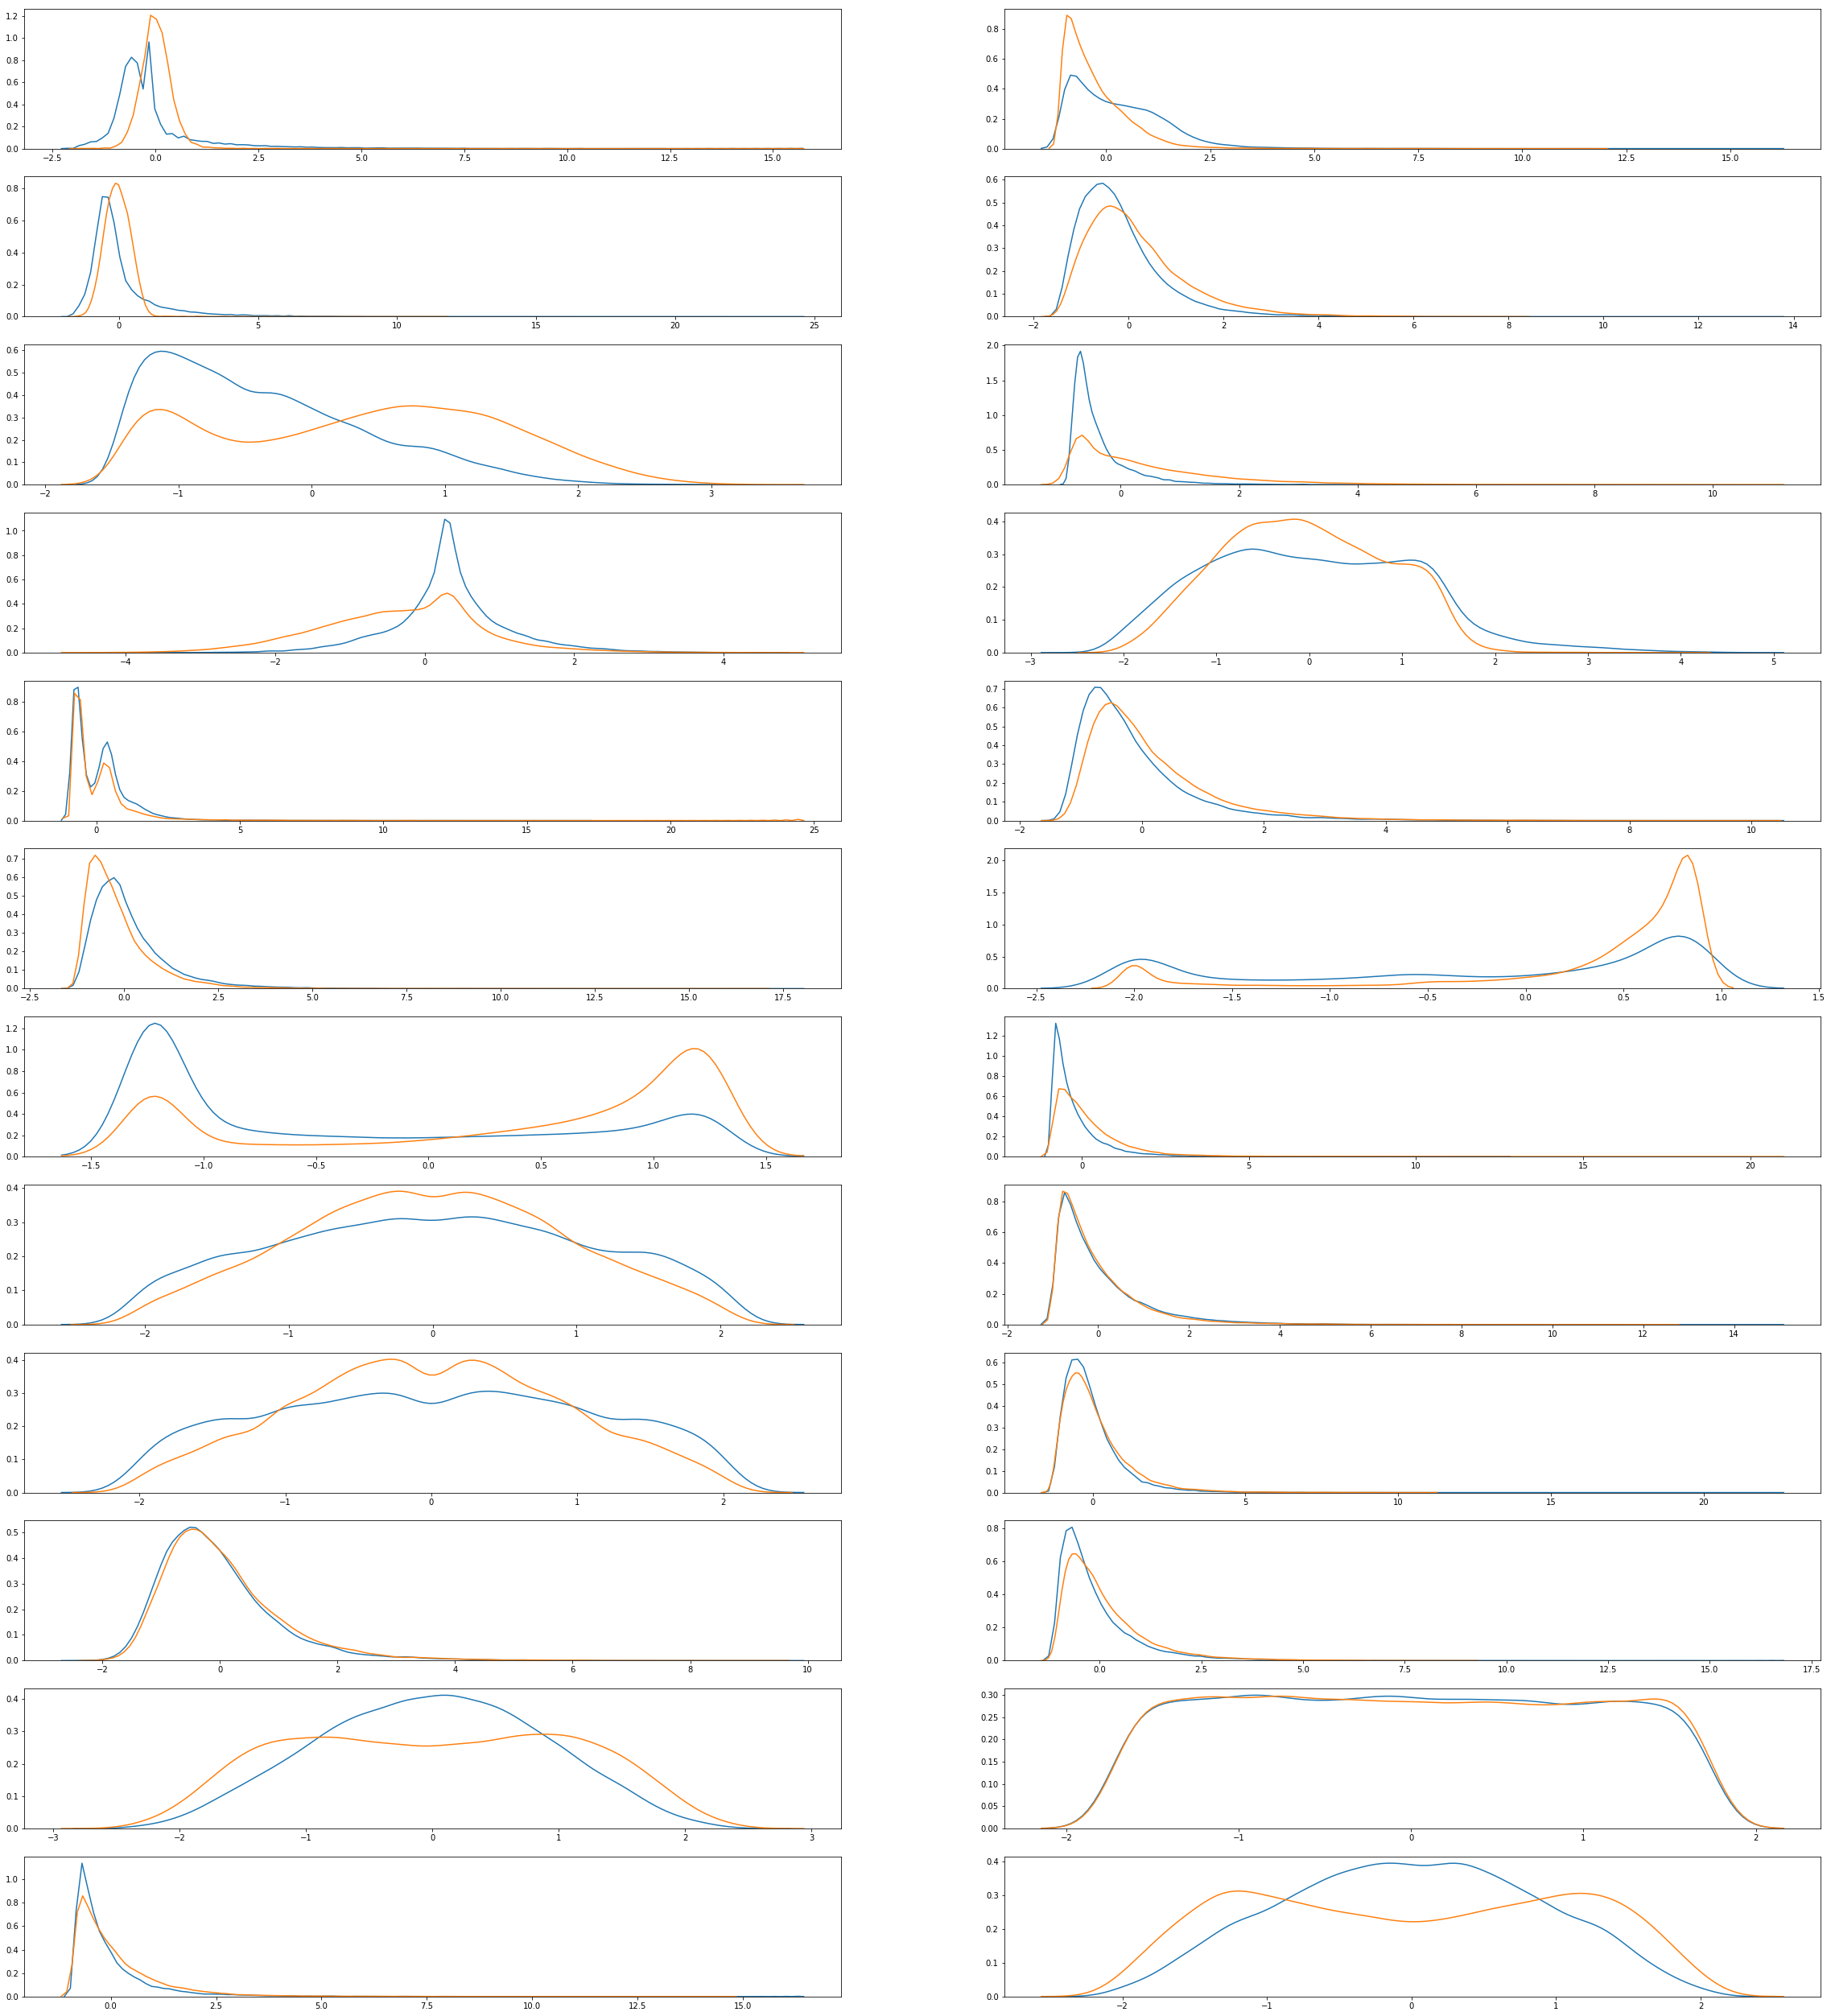

In [803]:
labels_dropped2=y[tX2_dropped_distribution[:,0].astype(int)]
tX2_label0=tX2_dropped_distribution[labels_dropped2==-1]
tX2_label1=tX2_dropped_distribution[labels_dropped2==1]
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX2_label0.shape[1]):
    plt.subplot(21,2,i)
    sns.distplot(tX2_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX2_label1[:,i],ax=plt.gca(),hist=False)

### Analyse tX3

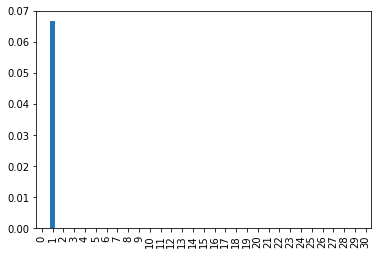

In [804]:
import pandas as pd

df=pd.DataFrame(tX3)
missing_series=df.isnull().sum()/df.shape[0]
missing_series.plot(kind="bar")

In [805]:
tX3[:,1:2]=nan_to_median(tX3[:,1:2])

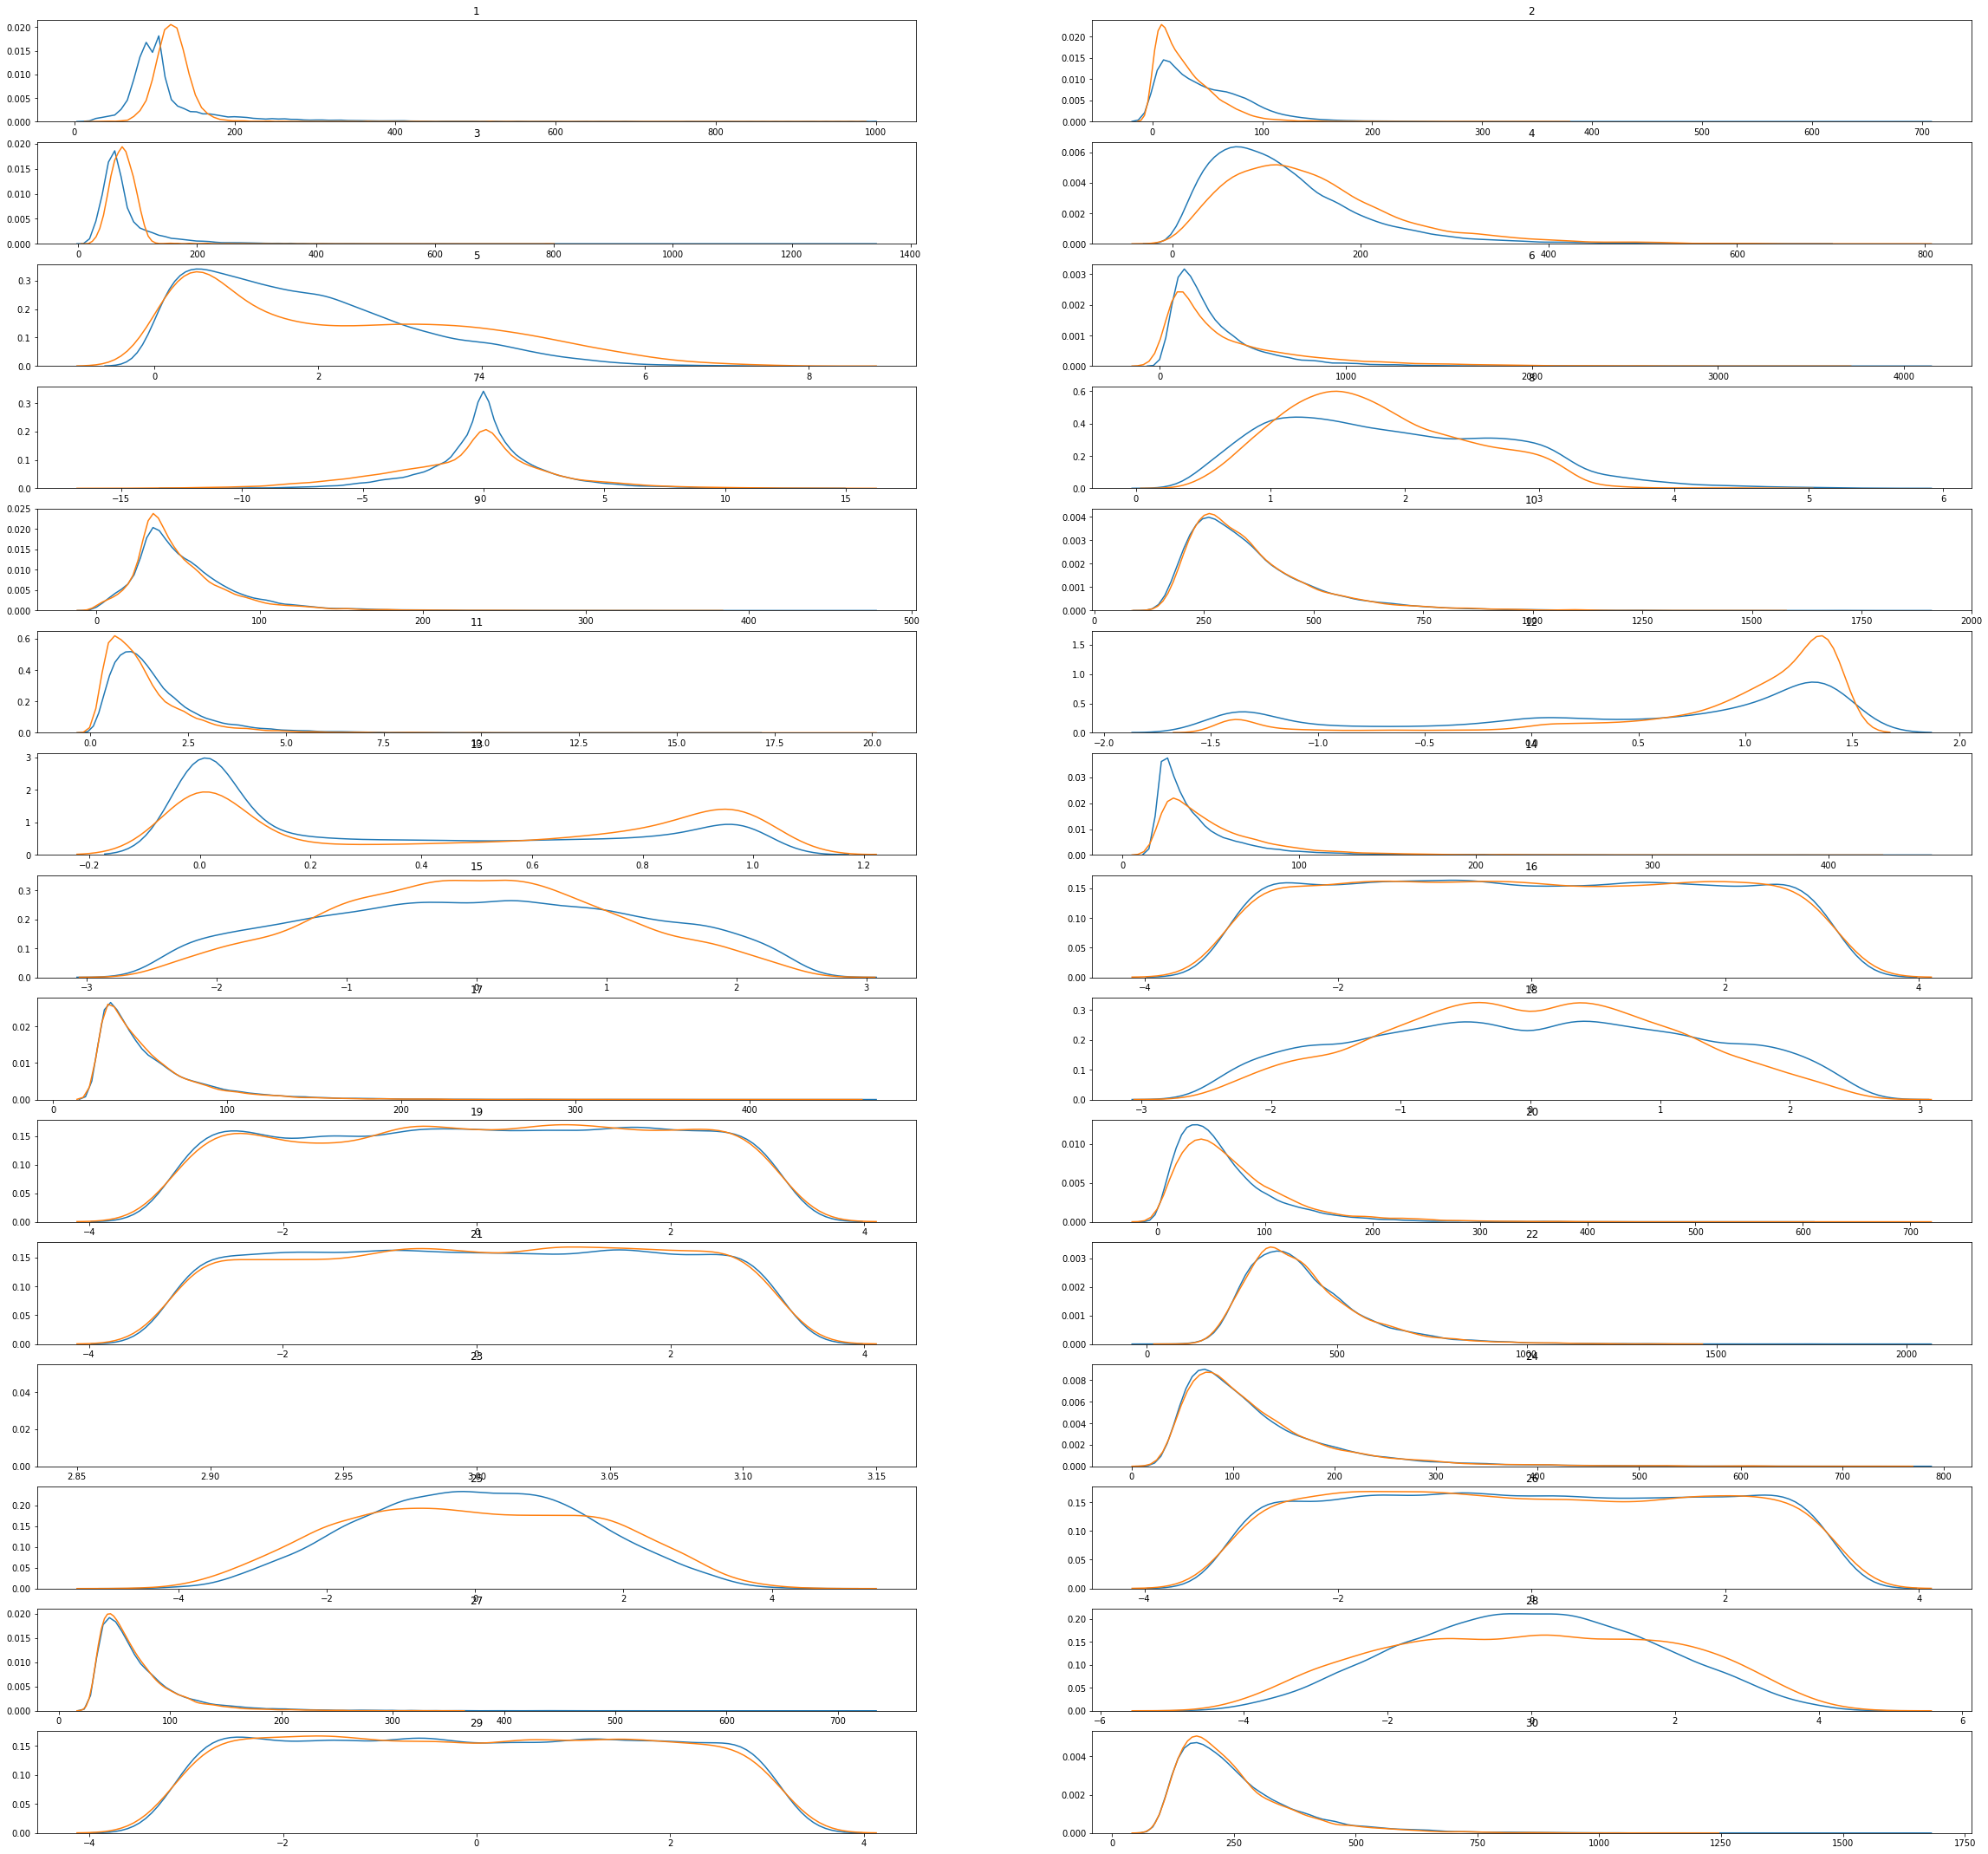

In [806]:
labels_dropped1=y[tX3[:,0].astype(int)]
tX3_label0=tX3[labels_dropped1==-1]
tX3_label1=tX3[labels_dropped1==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(31,2,i)
    plt.title(i)
    sns.distplot( tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot( tX3_label1[:,i],ax=plt.gca(),hist=False)

In [807]:
tX3_dropped_distribution=np.delete(tX3,[16,19,21,23,26],axis=1)
#tX3_dropped_distribution=np.delete(tX3,23,axis=1)

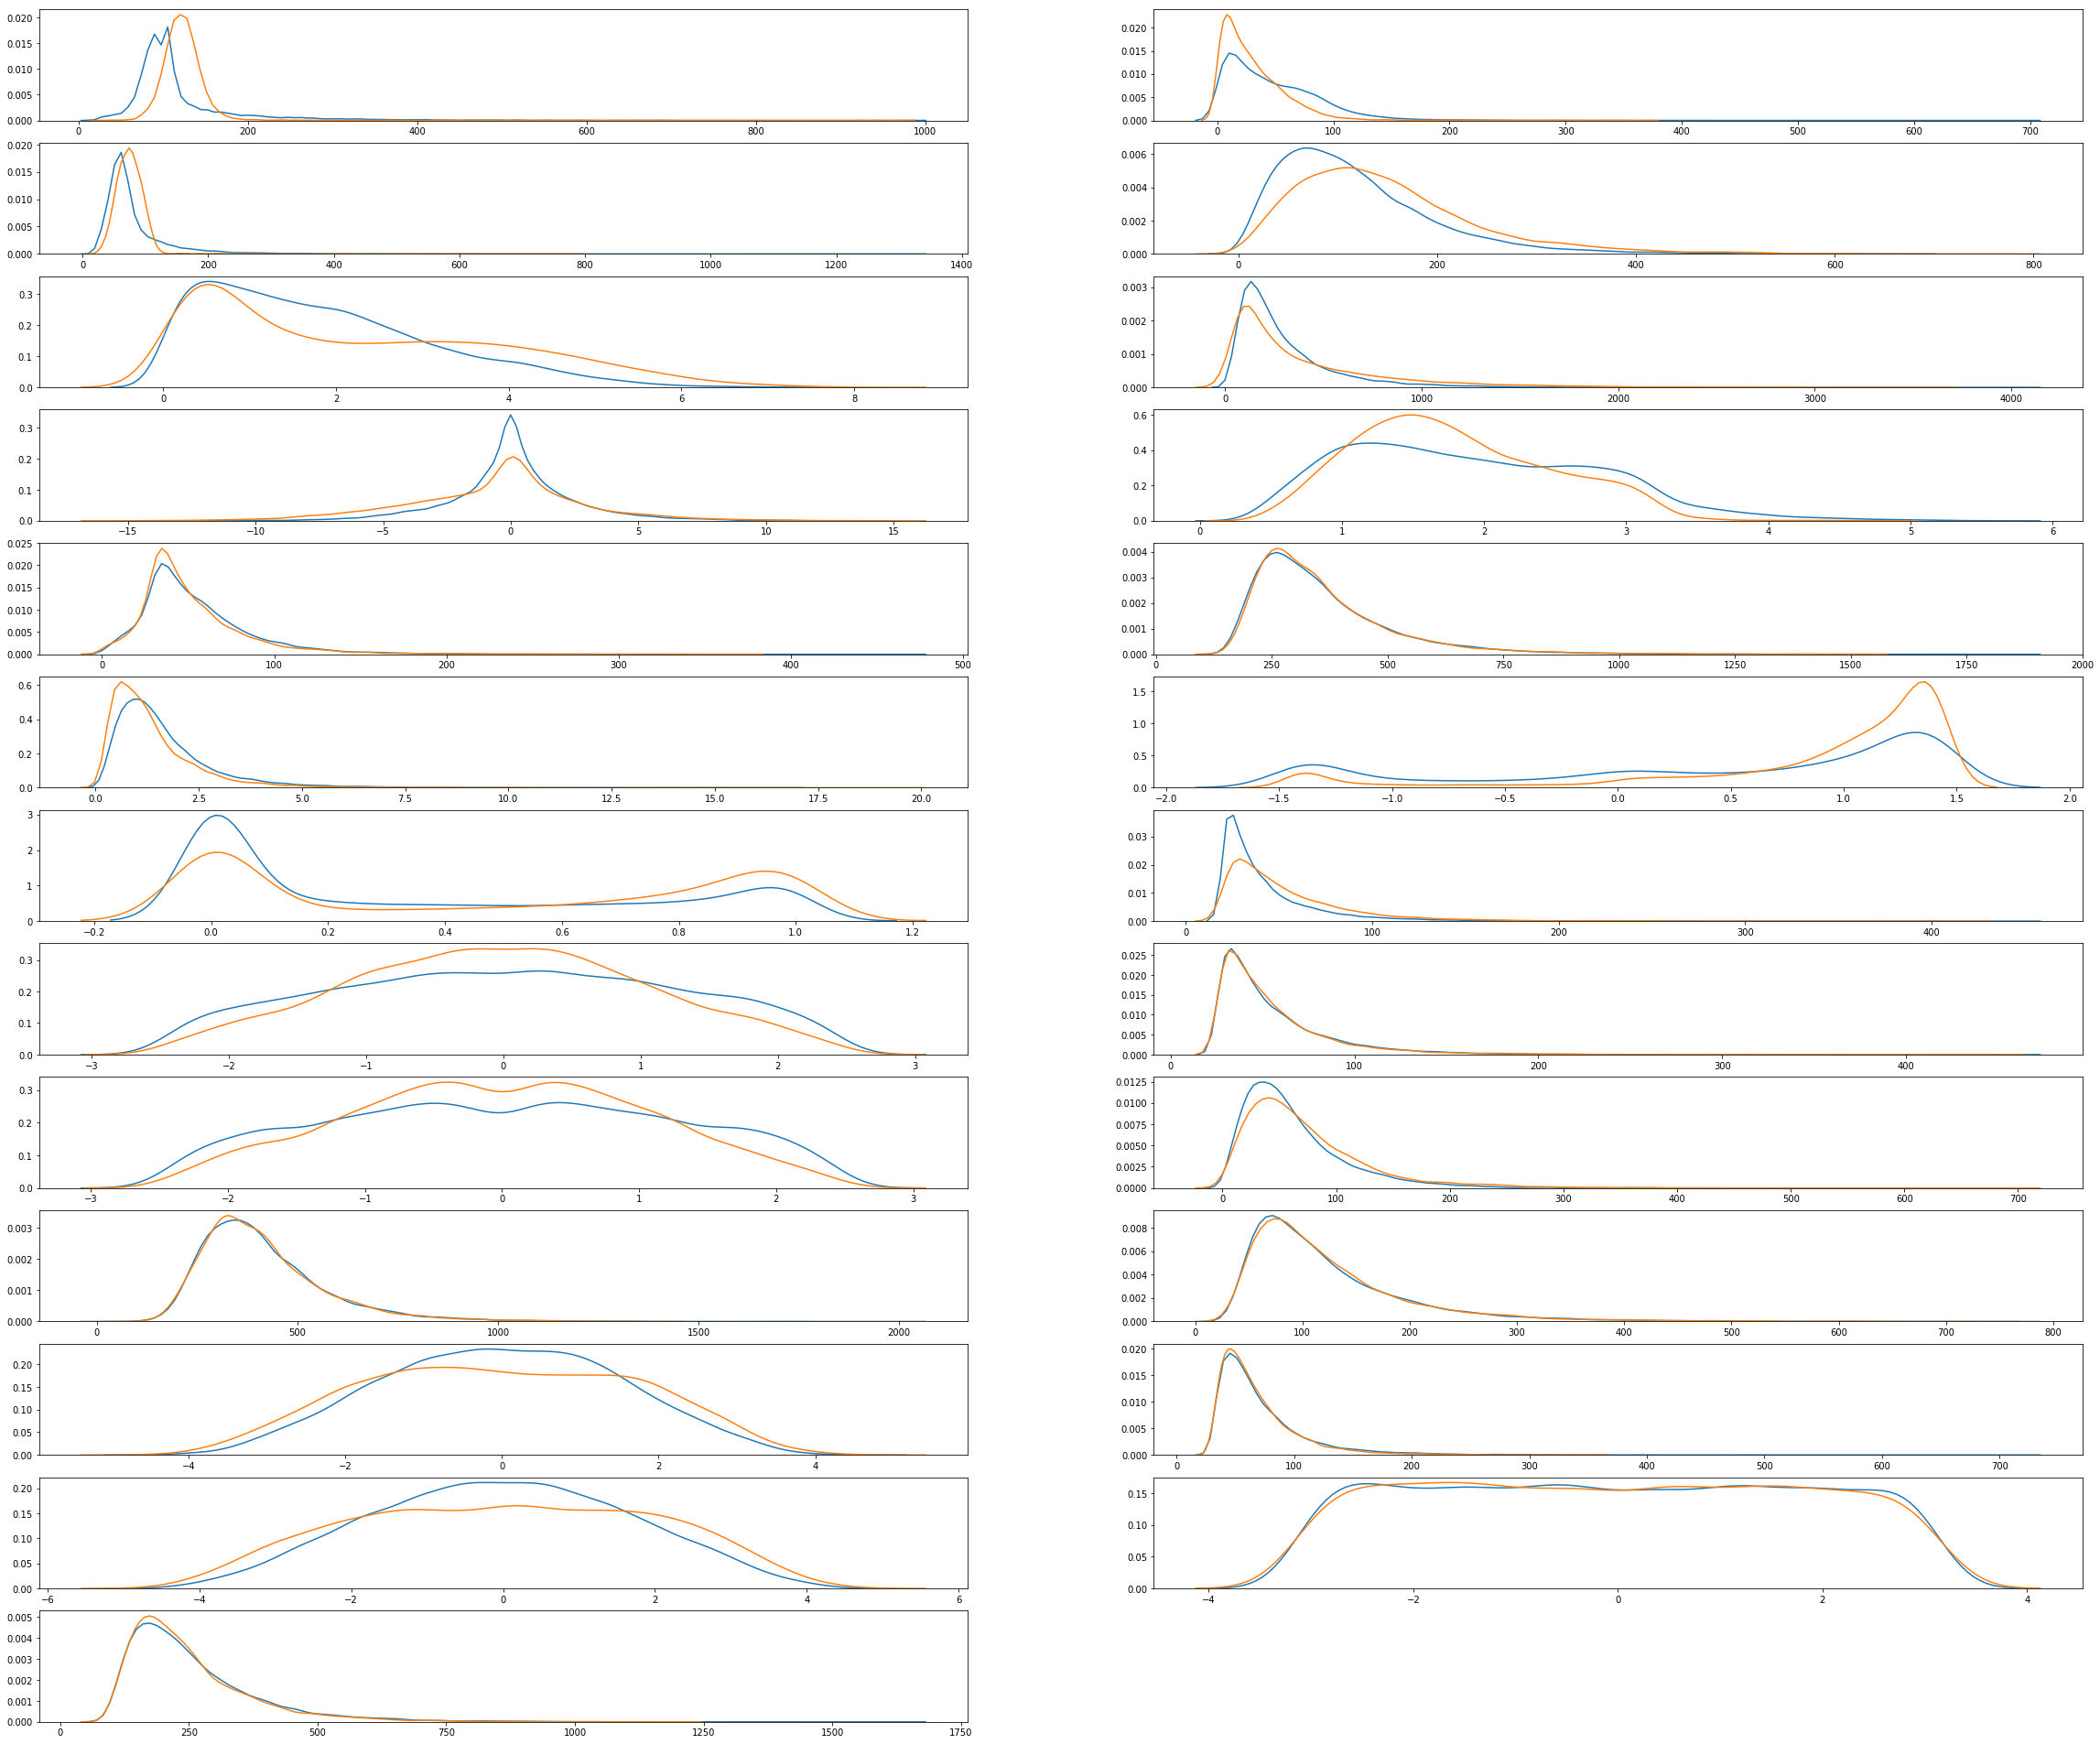

In [808]:
labels_dropped_distribution_2=y[tX3_dropped_distribution[:,0].astype(int)]
tX3_label0=tX3_dropped_distribution[labels_dropped_distribution_2==-1]
tX3_label1=tX3_dropped_distribution[labels_dropped_distribution_2==1]
fig=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(30,2,i)
    sns.distplot(tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX3_label1[:,i],ax=plt.gca(),hist=False)

In [809]:
#index_to_be_skewed=[2,6,10,14,16,22]
# tX3_skew_mins=np.apply_along_axis(np.min,0,tX3_dropped_distribution)
# tX3_dropped_distribution[:,index_to_be_skewed]=tX3_dropped_distribution[:,index_to_be_skewed]+np.abs(tX3_skew_mins[index_to_be_skewed])
# tX3_dropped_distribution[:,index_to_be_skewed]= np.log(tX3_dropped_distribution[:,index_to_be_skewed]+1)

tX3_dropped_distribution[:,1:]=standardize(tX3_dropped_distribution[:,1:])
tX3_dropped_distribution

array([[ 5.00000000e+00, -4.72301483e-01, -7.50382622e-01, ...,
         1.30561145e-01,  1.72208870e+00, -4.80029708e-01],
       [ 1.10000000e+01, -1.07901480e-01, -8.36110011e-01, ...,
         1.00308297e+00, -1.13506895e+00, -6.98166792e-01],
       [ 3.10000000e+01, -6.78776653e-03, -9.47602894e-01, ...,
        -7.03657593e-01, -3.25035826e-01, -1.44759688e-02],
       ...,
       [ 2.49966000e+05, -2.12994441e-01,  1.09656460e+00, ...,
         1.73365806e+00,  8.98830546e-01,  1.28550959e-01],
       [ 2.49992000e+05, -2.12994441e-01, -1.06035183e-01, ...,
         2.94475833e-01,  2.39783188e-01, -4.02887654e-01],
       [ 2.49993000e+05,  1.15563179e-01, -1.00336247e+00, ...,
         3.29962518e-01, -1.21001079e+00,  2.26346841e+00]])

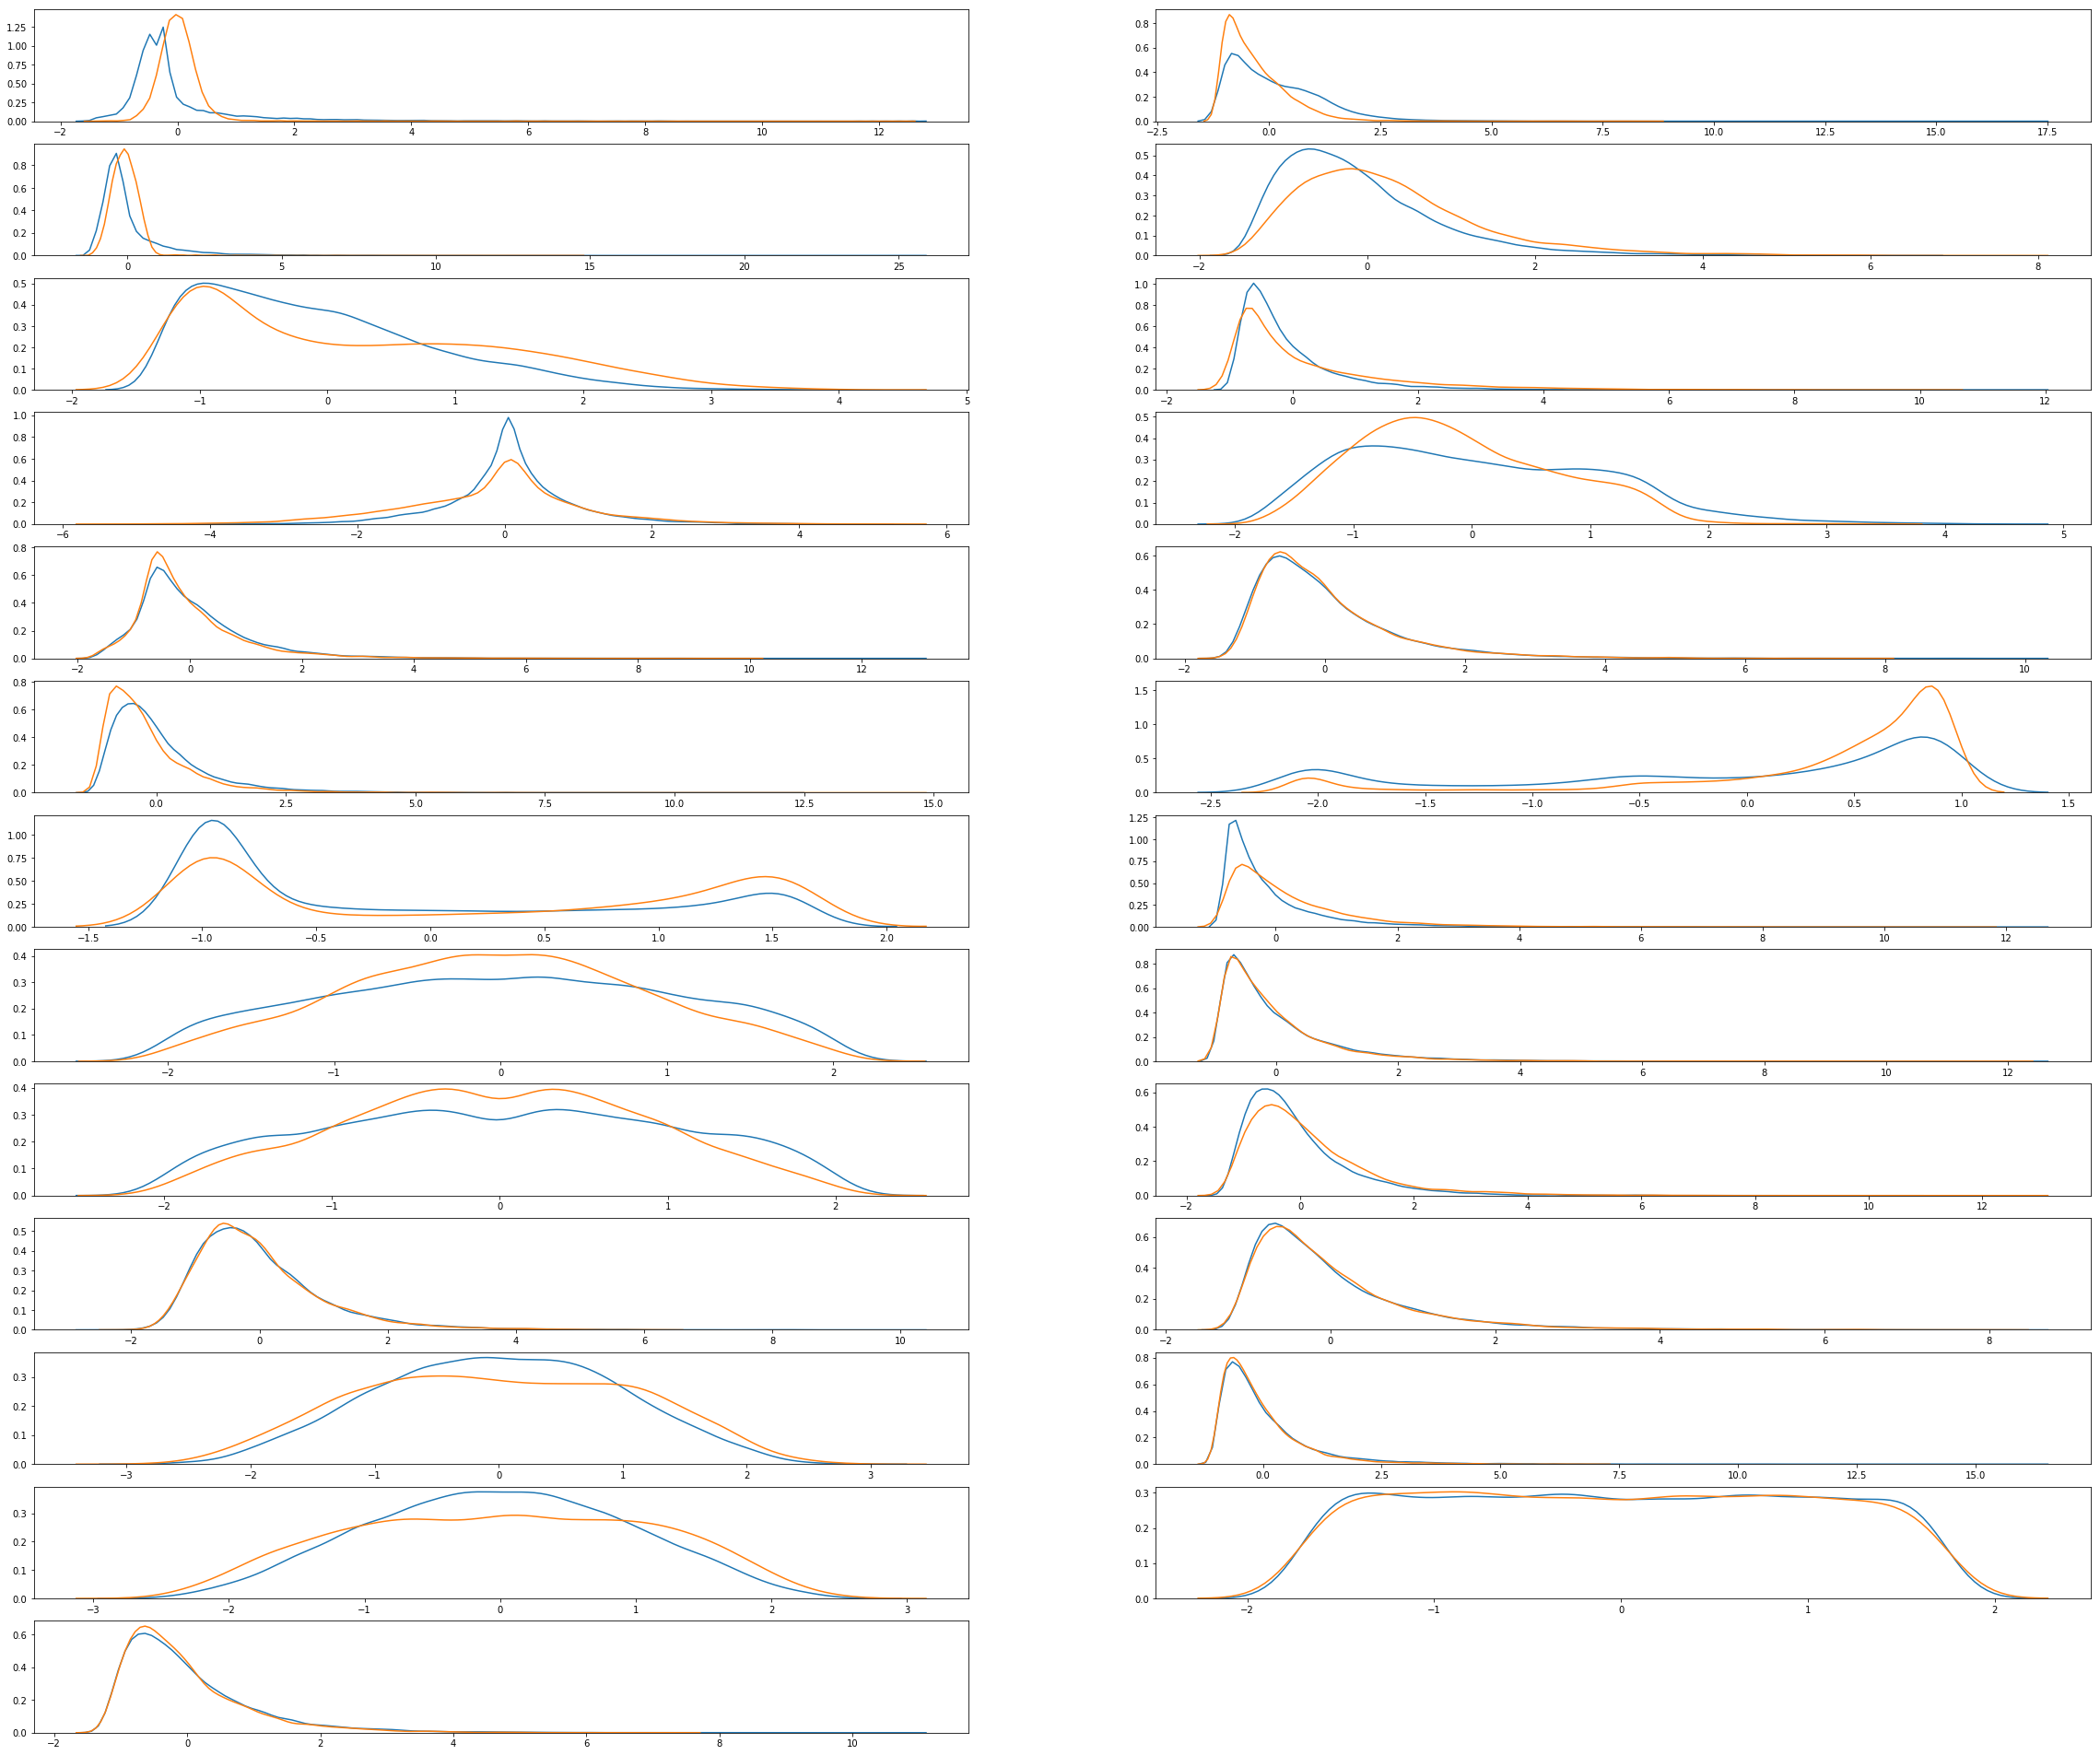

In [810]:
labels_dropped1=y[tX3_dropped_distribution[:,0].astype(int)]
tX3_label0=tX3_dropped_distribution[labels_dropped1==-1]
tX3_label1=tX3_dropped_distribution[labels_dropped1==1]
# sns.distplot( tX0_label0[:,3],ax=plt.gca(),hist=False)
fig1=plt.figure(figsize=(40,80))
for i in range(1,tX3_label0.shape[1]):
    plt.subplot(30,2,i)
    sns.distplot(tX3_label0[:,i],ax=plt.gca(),hist=False)
    sns.distplot(tX3_label1[:,i],ax=plt.gca(),hist=False)

## Do your thing crazy machine learning thing here :) ...

In [172]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

# Chosse your medicine...

## Least Squares

In [452]:
from build_polynomial import build_poly

def cross_validation(y, x, k_indices,k, degree):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    x_train_poly= build_poly(x_train,degree)
    x_test_poly= build_poly(x_test,degree)
    
    w,loss=m.least_squares(y_train, x_train_poly)
    
    loss_tr= np.sqrt(2* m.mse(y_train, x_train_poly, w))
    loss_te= np.sqrt(2* m.mse(y_test, x_test_poly, w))
    return loss_tr, loss_te

In [455]:
from plots import cross_validation_visualization

def cross_validation_demo(y, x,min_,max_):
    seed = 1
    k_fold = 4
    degrees = np.arange(min_,max_)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    min_loss=np.inf
    min_degree=0
    # ***************************************************
    for degree_ in degrees:
        loss_tr_degree=np.array([])
        loss_te_degree=np.array([])
        for k in range(k_fold):
            loss_tr_k, loss_te_k=cross_validation(y, x, k_indices, k, degree_)
            loss_tr_degree= np.append(loss_tr_degree,loss_tr_k)
            loss_te_degree= np.append(loss_te_degree,loss_te_k)
        rmse_tr.append(loss_tr_degree.mean())
        rmse_te.append(loss_te_degree.mean())
        if(loss_te_degree.mean()<min_loss):
            min_loss=loss_te_degree.mean()
            min_degree=degree_
    # ***************************************************    
    cross_validation_visualization(degrees, rmse_tr, rmse_te)
    return min_degree

(1, 0.27213967108895015)

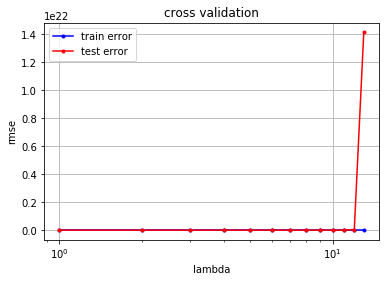

In [620]:
min_degree0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],1,14)
tx0=build_poly(tX0_dropped_distribution[:,1:],min_degree0)
w0,loss0=m.least_squares(y[tX0_dropped_distribution[:,0].astype(int)],tx0)
min_degree0,loss0

(5, 0.3175194983884033)

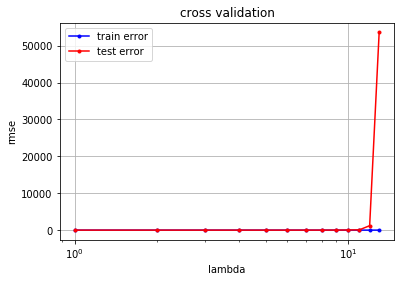

In [621]:
min_degree1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],1,14)
tx1=build_poly(tX1_dropped_distribution[:,1:],min_degree1)
w1,loss1=m.least_squares(y[tX1_dropped_distribution[:,0].astype(int)],tx1)
min_degree1,loss1

(3, 0.30362131148932653)

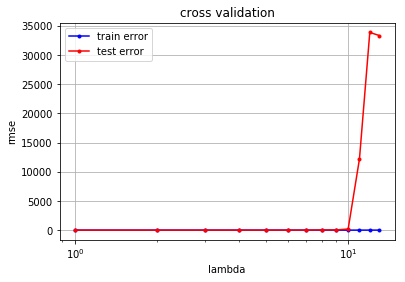

In [622]:
min_degree2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],1,14)
tx2=build_poly(tX2_dropped_distribution[:,1:],min_degree2)
w2,loss2=m.least_squares(y[tX2_dropped_distribution[:,0].astype(int)],tx2)
min_degree2,loss2

(4, 0.30171746857326376)

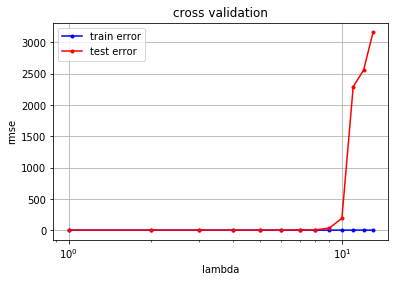

In [623]:
min_degree3=cross_validation_demo(y[tX3_dropped_distribution[:,0].astype(int)], tX3_dropped_distribution[:,1:],1,14)
tx3=build_poly(tX3_dropped_distribution[:,1:],min_degree3)
w3,loss3=m.least_squares(y[tX3_dropped_distribution[:,0].astype(int)],tx3)
min_degree3,loss3

In [625]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission

x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
#x1=np.delete(x1,[19,20]-np.ones(2),axis=1)

x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
#x2=np.delete(x2,23-1,axis=1)

x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)
#x3=np.delete(x3,23-1,axis=1)

y0Predict=predict_labels(w0,build_poly(x0, min_degree0))
y1Predict=predict_labels(w1,build_poly(x1, min_degree1))
y2Predict=predict_labels(w2,build_poly(x2, min_degree2))
y3Predict=predict_labels(w3,build_poly(x3, min_degree3))

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


## Gradient Descent

Hyper parameter optimization on gamma (need to do on degree after!)

In [377]:
max_iters = 50  #fixed
degree = 12 #fixed for now can be optimized ! 

In [378]:
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, gamma_, degree):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    x_train_poly= build_poly(x_train,degree)
    x_test_poly= build_poly(x_test,degree)
    
    w,loss=m.gradient_descent(y_train, x_train_poly, np.zeros(x_train_poly.shape[1]), max_iters, gamma_)
    
    loss_tr= np.sqrt(2* m.mse(y_train, x_train_poly, w))
    loss_te= np.sqrt(2* m.mse(y_test, x_test_poly, w))
    return loss_tr, loss_te

In [379]:
from plots import cross_validation_visualization

def cross_validation_demo(y, x,min_,max_):
    seed = 1
    k_fold = 4
    gammas = np.linspace(min_, max_, 50)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    min_loss=np.inf
    min_gamma=0
    # ***************************************************
    for gamma_ in gammas:
        loss_tr_gamma=np.array([])
        loss_te_gamma=np.array([])
        for k in range(k_fold):
            loss_tr_k, loss_te_k=cross_validation(y, x, k_indices, k, gamma_, degree)
            loss_tr_gamma= np.append(loss_tr_gamma,loss_tr_k)
            loss_te_gamma= np.append(loss_te_gamma,loss_te_k)
        rmse_tr.append(loss_tr_gamma.mean())
        rmse_te.append(loss_te_gamma.mean())
        if(loss_te_gamma.mean()<min_loss):
            min_loss=loss_te_gamma.mean()
            min_gamma=gamma_
    # ***************************************************    
    cross_validation_visualization(gammas, rmse_tr, rmse_te)
    return min_gamma

In [380]:
best_gamma0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],0.5,0.6)
tx0=build_poly(tX0_dropped_distribution[:,1:],degree)
w0,loss0= m.gradient_descent(y[tX0_dropped_distribution[:,0].astype(int)], tx0, np.zeros(tx0.shape[1]), 50, best_gamma0)
best_gamma0,w0,loss0

C:\Users\Ridha\home\ML II\Project\ML-Project-1-EPFL-master\Methods.py:19: RuntimeWarning: overflow encountered in matmul
  e = y- tx@w
C:\Users\Ridha\home\ML II\Project\ML-Project-1-EPFL-master\Methods.py:19: RuntimeWarning: invalid value encountered in matmul
  e = y- tx@w


KeyboardInterrupt: 

(0.4210526315789474,
 array([-0.28530899,  0.01080896, -0.2250646 , -0.24245976, -0.07295865,
         0.23678384,  0.05358756,  0.11890065, -0.14857859,  0.14515293,
         0.16257201,  0.00383869,  0.19632245, -0.00767993,  0.06868959,
        -0.03836871, -0.0009021 , -0.00293928,  0.00324749]),
 0.37276974718233225)

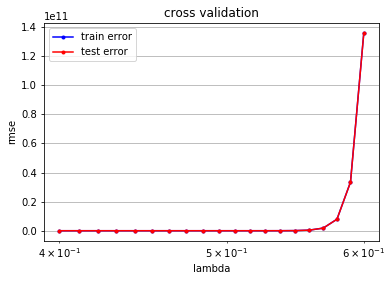

In [376]:
best_gamma1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],0.4,0.6)
tx1=build_poly(tX1_dropped_distribution[:,1:],degree)
w1,loss1= m.gradient_descent(y[tX1_dropped_distribution[:,0].astype(int)], tx1, np.zeros(tx1.shape[1]), 50, best_gamma1)
best_gamma1,w1,loss1

(0.3579263157894737,
 array([ 0.02161615,  0.00431747, -0.17119544, -0.14250498,  0.11141709,
         0.05298521,  0.18437149,  0.01947979,  0.21582526, -0.01255544,
         0.04719585, -0.13903172,  0.14129724,  0.16971872,  0.18033598,
        -0.00283486,  0.20985996, -0.00736187,  0.07835923, -0.16645949,
        -0.11630442,  0.00676745,  0.00502592,  0.05070747,  0.00491154]),
 0.355709867828671)

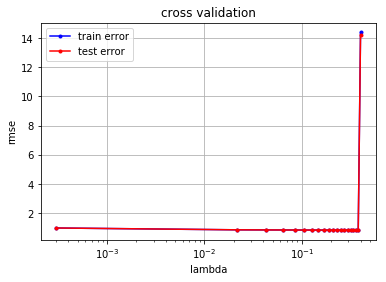

In [371]:
best_gamma2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],0.3,0.4)
tx2=build_poly(tX2_dropped_distribution[:,1:],degree)
w2,loss2= m.gradient_descent(y[tX2_dropped_distribution[:,0].astype(int)], tx2, np.zeros(tx2.shape[1]), 50, best_gamma2)
best_gamma2,w2,loss2

In [370]:
best_gamma3=cross_validation_demo(y[tX3_dropped_distribution[:,0].astype(int)], tX3_dropped_distribution[:,1:],0.3,0.4)
tx3=build_poly(tX3_dropped_distribution[:,1:],degree)
w3,loss3= m.gradient_descent(y[tX3_dropped_distribution[:,0].astype(int)],tx3, np.zeros(tx3.shape[1]), 50, best_gamma3)
best_gamma3,w3,loss3

(0.33157894736842103,
 array([-0.39261866,  0.00124615, -0.13731247, -0.11060598,  0.14682334,
        -0.08872259,  0.20101842,  0.02618869,  0.16021559, -0.00264165,
        -0.00988943, -0.11683036,  0.10062174,  0.09243651,  0.12858756,
        -0.0104485 ,  0.16068245, -0.00314836,  0.0591652 , -0.06109171,
        -0.1090742 , -0.00135349, -0.00598079,  0.00757707,  0.00051952,
        -0.08526068]),
 0.35984732760319055)

In [332]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/result.csv' # TODO: fill in desired name of output file for submission

x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)
x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)

y0Predict=predict_labels(w0,build_poly(x0, degree))
y1Predict=predict_labels(w1,build_poly(x1, degree))
y2Predict=predict_labels(w2,build_poly(x2, degree))
y3Predict=predict_labels(w3,build_poly(x3, degree))

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an 

## Ridge Regression

In [662]:
def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""

    x_train = x[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    y_train= y[np.array([p for i in range(k_indices.shape[0]) if i != k for p in k_indices[i]])]
    
    x_test=x[k_indices[k]]
    y_test=y[k_indices[k]]
    
    x_train_poly= build_poly(x_train,degree)
    x_test_poly= build_poly(x_test,degree)

    w,loss=m.ridge_regression(y_train, x_train_poly, lambda_)
    loss_tr= np.sqrt(2*m.mse(y_train, x_train_poly, w))
    loss_te= np.sqrt(2*m.mse(y_test, x_test_poly, w))
    return loss_tr, loss_te

In [695]:
from plots import cross_validation_visualization

def cross_validation_demo(y,x,min_,max_):
    seed = 1
    k_fold = 4
    lambdas = np.linspace(min_, max_, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    min_loss=np.inf
    min_lambda=-1
    # ***************************************************
    for lambda_ in lambdas:
        loss_tr_lambda=np.array([])
        loss_te_lambda=np.array([])
        for k in range(k_fold):
            loss_tr_k, loss_te_k=cross_validation(y, x, k_indices, k, lambda_, degree)
            loss_tr_lambda= np.append(loss_tr_lambda,loss_tr_k)
            loss_te_lambda= np.append(loss_te_lambda,loss_te_k)   
        rmse_tr.append(loss_tr_lambda.mean())
        rmse_te.append(loss_te_lambda.mean())
        if(loss_te_lambda.mean()<min_loss):
            min_loss=loss_te_lambda.mean()
            min_lambda=lambda_
    # ***************************************************    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    return min_lambda

In [873]:
min_lambda0=cross_validation_demo(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution[:,1:],0.0001, 1)
w0,loss0=m.ridge_regression(y[tX0_dropped_distribution[:,0].astype(int)], build_poly(tX0_dropped_distribution[:,1:],degree), min_lambda0)
min_lambda0,loss0

(0.10353793103448276, 0.2677727653111626)

(1e-05, 0.2859952947126819)

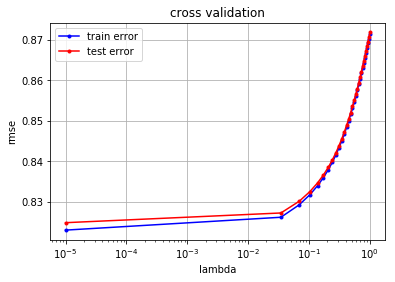

In [874]:
min_lambda1=cross_validation_demo(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:],0.00001,1)
w1,loss1=m.ridge_regression(y[tX1_dropped_distribution[:,0].astype(int)], build_poly(tX1_dropped_distribution[:,1:],12), min_lambda1)
min_lambda1,loss1

(1e-05, 0.25777153822798515)

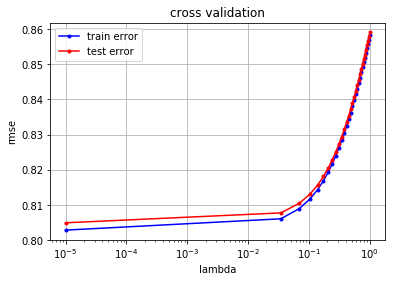

In [876]:
min_lambda2=cross_validation_demo(y[tX2_dropped_distribution[:,0].astype(int)], tX2_dropped_distribution[:,1:],0.00001, 1)
w2,loss2=m.ridge_regression(y[tX2_dropped_distribution[:,0].astype(int)], build_poly(tX2_dropped_distribution[:,1:],9), min_lambda2)
min_lambda2,loss2

(1e-05, 0.2574386201708307)

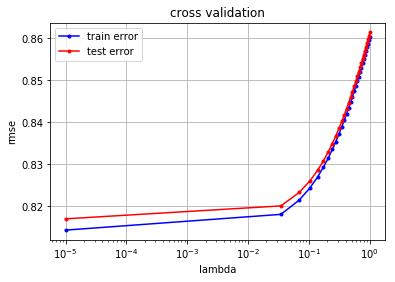

In [877]:
min_lambda3=cross_validation_demo(y[tX3_dropped_distribution[:,0].astype(int)], tX3_dropped_distribution[:,1:],0.00001, 1)
w3,loss3=m.ridge_regression(y[tX3_dropped_distribution[:,0].astype(int)], build_poly(tX3_dropped_distribution[:,1:],12), min_lambda3)
min_lambda3,loss3

In [878]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '../data/sample-submission-2.csv' # TODO: fill in desired name of output file for submission

x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]

for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)

x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)

x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
#x1=np.delete(x1,[19,20]-np.ones(2),axis=1)

x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
#x2=np.delete(x2,23-1,axis=1)

x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)
#x3=np.delete(x3,23-1,axis=1)

y0Predict=predict_labels(w0,build_poly(x0, 2))
y1Predict=predict_labels(w1,build_poly(x1, 12))
y2Predict=predict_labels(w2,build_poly(x2, 9))
y3Predict=predict_labels(w3,build_poly(x3, 12))

y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict

create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
C:\Users\Ridha\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: DeprecationWarning: using a non-integer array as obj in delete will result in an 

## Logistic Regression

In [81]:
# from gradient_descent import *
from plots import gradient_descent_visualization
import datetime

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.05

# Initialization
w_initial = np.zeros(tX.shape[1])

# Start gradient descent.
start_time = datetime.datetime.now()
weights, loss = m.gradient_descent(y, tX, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print("Loss",loss)

ModuleNotFoundError: No module named 'grid_search'

### cross validation

In [82]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [507]:
from build_polynomial import build_poly_matrix

def cross_validation(y, x, k_indices, k, degree,gamma):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
#     print(y_te.shape, x_te.shape)
    # form data with polynomial degree
    tx_tr = build_poly_matrix(x_tr, degree)
    tx_te = build_poly_matrix(x_te, degree)
    # ridge regression
    w,loss = m.gradient_descent(y_tr, tx_tr,np.zeros(tx_tr.shape[1]), 50,gamma)
    # calculate the loss for train and test data
    
    loss_tr = np.sqrt(2 * m.mse(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * m.mse(y_te, tx_te, w))
    return loss_tr, loss_te,w

In [510]:
def cross_validation_demo():
    seed = 12
    k_fold = 4
    degree = 2
    gammas= np.linspace(0.001, 0.1, 20)
    # split data in k fold
    k_indices = build_k_indices(y[tX1_dropped_distribution[:,0].astype(int)], k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # cross validation
    for gamma in gammas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,_ = cross_validation(y[tX1_dropped_distribution[:,0].astype(int)], tX1_dropped_distribution[:,1:], k_indices, k, degree, gamma)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))

    cross_validation_visualization(gammas, rmse_tr, rmse_te)

cross_validation_demo()

## ridge regression

In [704]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [705]:
degree=4

In [706]:
from build_polynomial import build_poly_matrix

def cross_validation_ridge(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # get k'th subgroup in test, others in train
    te_indice = k_indices[k]
    tr_indice = k_indices[~(np.arange(k_indices.shape[0]) == k)]
    tr_indice = tr_indice.reshape(-1)
    y_te = y[te_indice]
    y_tr = y[tr_indice]
    x_te = x[te_indice]
    x_tr = x[tr_indice]
#     print(y_te.shape, x_te.shape)
    # form data with polynomial degree
    tx_tr = build_poly_matrix(x_tr, degree)
    tx_te = build_poly_matrix(x_te, degree)
    # ridge regression
    w,_ = m.ridge_regression(y_tr, tx_tr, lambda_)
    # calculate the loss for train and test data
    loss_tr = np.sqrt(2 * m.mse(y_tr, tx_tr, w))
    loss_te = np.sqrt(2 * m.mse(y_te, tx_te, w))
    
#     print("loss_tr: ",loss_tr)
#     print("loss_te: ",loss_te)
    
#     print(tx_tr@w)
#     res_tr=y_tr@np.sign(tx_tr@w)
#     print(res_tr/len(y_tr))
#     res_te=y_te@np.sign(tx_te@w)
#     print(res_te/len(y_te))
    return loss_tr, loss_te,w

In [707]:
def cross_validation_demo_ridge(t):
    seed = 12
    k_fold = 5
    lambdas = np.logspace(-4, -2, 20)
    # split data in k fold
    k_indices = build_k_indices(y[t[:,0].astype(int)], k_fold, seed)
    
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    weights_list=[]
    # cross validation
    for lambda_ in lambdas:
        rmse_tr_tmp = []
        rmse_te_tmp = []
        for k in range(k_fold):
            loss_tr, loss_te,w = cross_validation_ridge(y[t[:,0].astype(int)], t[:,1:], k_indices, k, lambda_,degree)
            rmse_tr_tmp.append(loss_tr)
            rmse_te_tmp.append(loss_te)
        rmse_tr.append(np.mean(rmse_tr_tmp))
        rmse_te.append(np.mean(rmse_te_tmp))
        weights_list.append(w)
        
    min_index=np.argmin(rmse_te)
    weights=weights_list[min_index]
          
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)
    
    return weights

In [708]:
weights0=cross_validation_demo_ridge(tX0_dropped_distribution)


In [ ]:
weights1=cross_validation_demo_ridge(tX1_dropped_distribution)


In [ ]:
weights2=cross_validation_demo_ridge(tX2_dropped_distribution)


In [ ]:
weights3=cross_validation_demo_ridge(tX3_dropped_distribution)

### Logistic regression


In [ ]:
w_l,loss_l=m.reg_logistic_regression(y[tX0_dropped_distribution[:,0].astype(int)], tX0_dropped_distribution, 0.1, np.zeros((tX0_dropped_distribution.shape[1], 1)), 10, 0.01)

## Generate predictions and save ouput in csv format for submission:

In [709]:
DATA_TEST_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
OUTPUT_PATH = '/Users/gerald/Workspaces/Machine Leaning/ML-Project-1-EPFL/result.csv' # TODO: fill in desired name of output file for submission


In [710]:
x0=[]
x1=[]
x2=[]
x3=[]
y0indices=[]
y1indices=[]
y2indices=[]
y3indices=[]
for index, jet_num in enumerate(tX_test[:,22]):   
    if(int(jet_num)==0):
        x0.append(tX_test[index])
        y0indices.append(index)
    if(int(jet_num)==1):
        x1.append(tX_test[index])
        y1indices.append(index)
    if(int(jet_num)==2):
        x2.append(tX_test[index])
        y2indices.append(index)
    if(int(jet_num)==3):
        x3.append(tX_test[index])
        y3indices.append(index)
        
x0=np.array(x0)
x1=np.array(x1)
x2=np.array(x2)
x3=np.array(x3)
x0=np.delete(x0,[5,6,7,13,24,25,26,27,28,29]-np.ones(10),axis=1)
x0=np.delete(x0,[4,12,19,20]-np.ones(4),axis=1)
x1=np.delete(x1,[5,6,7,13,27,28,29]-np.ones(7),axis=1)
x1=np.delete(x1,[12,15,17,19,20]-np.ones(5),axis=1)
x2=np.delete(x2,[16,19,21,23,29,30]-np.ones(6),axis=1)
x3=np.delete(x3,[16,19,21,23,26]-np.ones(5),axis=1)

y0Predict=predict_labels(weights0,build_poly_matrix(x0, degree))
y1Predict=predict_labels(weights1,build_poly_matrix(x1, degree))
y2Predict=predict_labels(weights2,build_poly_matrix(x2, degree))
y3Predict=predict_labels(weights3,build_poly_matrix(x3, degree))



//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the futur

In [711]:
y_pred=np.empty(tX_test.shape[0])
y_pred[y0indices]=y0Predict
y_pred[y1indices]=y1Predict
y_pred[y2indices]=y2Predict
y_pred[y3indices]=y3Predict
# y_pred = predict_labels(weights, build_poly(tX_test,degree))
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)